In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
import datetime as dt
import seaborn as sns
import scipy.stats as st
import scipy
from scipy.stats import chi2_contingency
from functions import plot_dendrogram
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import datasets
from functions import *
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import ks_2samp
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from scipy.stats import t, shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [2]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

Proposer une application dédiée à la pratique sportive et plus particulièrement à la prise de masse.  L’objectif est d’adapter un régime alimentaire sain de la meilleure qualité nutritionnelle possible à cette pratique sportive en scannant le code barre d’un aliment.


In [3]:
df = pd.read_csv('P3_final_KNN.csv')
df

/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,saturated-fat_100g,carbohydrates_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,index,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives,additives_tags,additives_fr,nutrition_grade_fr,states,states_tags,states_fr
0,28.57,0.0,0.018,14.29,3.6,3.57,0.00000,0.000000,0.000000,0.021400,0.000000,0.00129,14.0,14.0,28.57,64.29,0.000000,0.0,0.0,2243.0,1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
1,17.86,0.0,0.000,17.86,7.1,17.86,0.63500,0.250000,0.000000,0.000000,0.071000,0.00129,0.0,0.0,0.00,60.71,0.000000,0.0,0.0,1941.0,2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
2,18.75,0.0,0.000,15.62,9.4,14.06,0.13970,0.055000,0.000000,0.002067,0.062000,0.00422,7.0,7.0,4.69,57.81,2.000000,0.0,0.0,1833.0,7,16124,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,Daddy's Muesli,daddy-s-muesli,US,en:united-states,États-Unis,"Org oats, org hemp granola (org oats, evaporat...",64 g (0.5 cup),[ org-oats -> en:org-oats ] [ oats -> en:oa...,"en:e123,en:e307a","E123 - Amarante,E307a - Tocophérol",c,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
3,36.67,0.0,0.000,3.33,6.7,16.67,1.60782,0.633000,0.000067,0.000000,0.133000,0.00360,12.0,12.0,5.00,36.67,1.000000,0.0,0.0,2230.0,12,16872,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055650,2017-03-09T10:34:10Z,1489055651,2017-03-09T10:34:11Z,Zen Party Mix,Sunridge,sunridge,US,en:united-states,États-Unis,"Roasted peanuts (peanuts, peanut or canola oil...",30 g (0.25 cup),[ roasted-peanuts -> en:roasted-peanuts ] [...,en:e100,E100 - Curcumine,d,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
4,18.18,0.0,0.000,21.82,9.1,14.55,0.02286,0.009000,0.000273,0.005467,0.072667,0.00131,0.0,0.0,1.82,60.00,0.000000,0.0,0.0,1824.0,15,18012,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055652,2017-03-09T10:34:12Z,1489055653,2017-03-09T10:34:13Z,Cinnamon Nut Granola,Grizzlies,grizzlies,US,en:united-states,États-Unis,"Organic rolled oats, honey, raisins, almonds, ...",55 g (0.5 cup),[ organic-rolled-oats -> en:organic-rolled-oa...,NaN,NaN,b,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174819,0.00,0.0,0.000,2.35,4.7,1.18,0.03048,0.012000,0.000000,0.

## Analyses

In [4]:
clean_df = df.copy()

In [5]:
# list of the columns
clean_df.columns.tolist()

['fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'energy_100g',
 'index',
 'code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'brands',
 'brands_tags',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'serving_size',
 'additives',
 'additives_tags',
 'additives_fr',
 'nutrition_grade_fr',
 'states',
 'states_tags',
 'states_fr']

### Selected variables for the application

['fat_100g',  
 'trans-fat_100g',  
 'cholesterol_100g',  
 'sugars_100g',  
 'fiber_100g',  
 'proteins_100g',  
 'salt_100g',  
 'sodium_100g',  
 'vitamin-a_100g',  
 'vitamin-c_100g',  
 'calcium_100g',  
 'iron_100g',  
 'nutrition-score-fr_100g',  
 'saturated-fat_100g',  
 'carbohydrates_100g',  
 'additives_n',  
 'energy_100g',  
 'code',  
 'product_name',  
 'ingredients_text',  
 'nutrition_grade_fr']  

Hypothèse : Le Nutriscore est suffisant pour permettre de choisir et de sélectionner avec soin les aliments necéssaire à la prise de masse


In [6]:
vars_all_ok = clean_df.loc[:,['fat_100g',
'trans-fat_100g',
'cholesterol_100g',
'sugars_100g',
'fiber_100g',
'proteins_100g',
'salt_100g',
'sodium_100g',
'vitamin-a_100g',
'vitamin-c_100g',
'calcium_100g',
'iron_100g',
'nutrition-score-fr_100g',
'saturated-fat_100g',
'carbohydrates_100g',
'additives_n',
'energy_100g',
'product_name',
'ingredients_text',
'nutrition_grade_fr']]

vars_all_ok

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,carbohydrates_100g,additives_n,energy_100g,product_name,ingredients_text,nutrition_grade_fr
0,28.57,0.0,0.018,14.29,3.6,3.57,0.00000,0.000000,0.000000,0.021400,0.000000,0.00129,14.0,28.57,64.29,0.000000,2243.0,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",d
1,17.86,0.0,0.000,17.86,7.1,17.86,0.63500,0.250000,0.000000,0.000000,0.071000,0.00129,0.0,0.00,60.71,0.000000,1941.0,Peanuts,"Peanuts, wheat flour, sugar, rice flour, tapio...",b
2,18.75,0.0,0.000,15.62,9.4,14.06,0.13970,0.055000,0.000000,0.002067,0.062000,0.00422,7.0,4.69,57.81,2.000000,1833.0,Organic Muesli,"Org oats, org hemp granola (org oats, evaporat...",c
3,36.67,0.0,0.000,3.33,6.7,16.67,1.60782,0.633000,0.000067,0.000000,0.133000,0.00360,12.0,5.00,36.67,1.000000,2230.0,Zen Party Mix,"Roasted peanuts (peanuts, peanut or canola oil...",d
4,18.18,0.0,0.000,21.82,9.1,14.55,0.02286,0.009000,0.000273,0.005467,0.072667,0.00131,0.0,1.82,60.00,0.000000,1824.0,Cinnamon Nut Granola,"Organic rolled oats, honey, raisins, almonds, ...",b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174819,0.00,0.0,0.000,2.35,4.7,1.18,0.03048,0.012000,0.000000,0.000000,0.000000,0.00127,0.0,0.00,87.06,0.000000,1477.0,Natural Cassava,Cassava.,a
174820,2.80,0.0,0.000,2.60,5.9,13.00,0.68000,0.267717,0.000000,0.000000,0.143000,0.00380,7.0,0.60,74.80,0.000000,1643.0,Tartines craquantes bio au sarrasin,NaN,a
174821,50.00,0.0,0.000,3.89,12.2,21.22,0.10000,0.039370,0.000000,0.000700,0.202333,0.00493,0.0,3.73,20.24,0.333333,2406.0,Amandes,NaN,b
174822,0.20,0.0,0.000,0.50,0.2,0.50,0.02540,0.010000,0.000004,0.002500,0.000000,0.00041,2.0,0.20,0.50,0.000000,21.0,Thé vert Earl grey,"thé vert, arôme naturel bergamote avec autres ...",c


In [7]:
vars_ok = vars_all_ok._get_numeric_data()
vars_ok

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,carbohydrates_100g,additives_n,energy_100g
0,28.57,0.0,0.018,14.29,3.6,3.57,0.00000,0.000000,0.000000,0.021400,0.000000,0.00129,14.0,28.57,64.29,0.000000,2243.0
1,17.86,0.0,0.000,17.86,7.1,17.86,0.63500,0.250000,0.000000,0.000000,0.071000,0.00129,0.0,0.00,60.71,0.000000,1941.0
2,18.75,0.0,0.000,15.62,9.4,14.06,0.13970,0.055000,0.000000,0.002067,0.062000,0.00422,7.0,4.69,57.81,2.000000,1833.0
3,36.67,0.0,0.000,3.33,6.7,16.67,1.60782,0.633000,0.000067,0.000000,0.133000,0.00360,12.0,5.00,36.67,1.000000,2230.0
4,18.18,0.0,0.000,21.82,9.1,14.55,0.02286,0.009000,0.000273,0.005467,0.072667,0.00131,0.0,1.82,60.00,0.000000,1824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174819,0.00,0.0,0.000,2.35,4.7,1.18,0.03048,0.012000,0.000000,0.000000,0.000000,0.00127,0.0,0.00,87.06,0.000000,1477.0
174820,2.80,0.0,0.000,2.60,5.9,13.00,0.68000,0.267717,0.000000,0.000000,0.143000,0.00380,7.0,0.60,74.80,0.000000,1643.0
174821,50.00,0.0,0.000,3.89,12.2,21.22,0.10000,0.039370,0.000000,0.000700,0.202333,0.00493,0.0,3.73,20.24,0.333333,2406.0
174822,0.20,0.0,0.000,0.50,0.2,0.50,0.02540,0.010000,0.000004,0.002500,0.000000,0.00041,2.0,0.20,0.50,0.000000,21.0


In [8]:
vars_ok.describe(include='all')

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,carbohydrates_100g,additives_n,energy_100g
count,174824.000000,174824.000000,174824.000000,174824.000000,174824.000000,174824.000000,174824.000000,174824.000000,174824.000000,174824.000000,174824.000000,174824.000000,174824.000000,174824.000000,174824.000000,174824.000000,1.748240e+05
mean,8.654820,0.048599,0.017761,9.979494,2.405866,7.236850,1.110926,0.441791,0.000156,0.007731,0.080579,0.002924,7.210353,3.118245,29.413796,1.993963,9.755712e+02
std,10.542739,0.656987,0.049134,13.980871,4.119988,7.321852,2.400589,1.085504,0.002654,0.113386,0.218491,0.109704,6.866638,5.552550,27.223916,2.518438,7.839684e+03
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.433333,0.000000,0.000000,1.000000,0.000000,1.600000,0.100000,0.039370,0.000000,0.000000,0.000000,0.000050,0.000000,0.000000,6.300000,0.000000,3.560000e+02
50%,4.000000,0.000000,0.000000,3.600000,1.200000,5.360000,0.680000,0.267717,0.000026,0.000200,0.035000,0.000840,5.000000,0.880000,17.650000,1.000000,8.950000e+02
75%,14.000000,0.000000,0.023667,13.010000,3.300000,10.640000,1.374140,0.541000,0.000118,0.004967,0.096000,0.001930,13.000000,3.850000,53.570000,3.000000,1.490000e+03
max,75.000000,83.000000,13.846000,78.000000,90.000000,94.700000,62.230000,74.000000,0.800000,35.714300,37.000000,25.000000,30.000000,99.900000,99.400000,31.000000,3.251373e+06


In [9]:
vars_ok.isna().sum()

fat_100g                   0
trans-fat_100g             0
cholesterol_100g           0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
sodium_100g                0
vitamin-a_100g             0
vitamin-c_100g             0
calcium_100g               0
iron_100g                  0
nutrition-score-fr_100g    0
saturated-fat_100g         0
carbohydrates_100g         0
additives_n                0
energy_100g                0
dtype: int64

In [10]:
heat = vars_ok.corr()
heat

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,carbohydrates_100g,additives_n,energy_100g
fat_100g,1.000000,0.055932,0.213983,-0.121406,0.063068,0.300552,0.061135,0.049890,0.011681,-0.021745,0.183524,0.005526,0.576483,0.627999,-0.009834,0.011163,0.052133
trans-fat_100g,0.055932,1.000000,0.003823,-0.004176,0.001189,0.002137,0.010152,0.008538,-0.001823,-0.002357,-0.003414,-0.000592,0.048279,0.040836,0.013299,0.011027,0.003848
cholesterol_100g,0.213983,0.003823,1.000000,-0.110406,-0.130781,0.303460,0.035552,0.029482,-0.002810,-0.018002,0.129556,0.000434,0.193277,0.271921,-0.206545,0.008670,0.003321
sugars_100g,-0.121406,-0.004176,-0.110406,1.000000,-0.000801,-0.273581,-0.126793,-0.113121,-0.009720,0.014806,-0.063539,-0.002428,0.327819,-0.067072,0.522366,0.181184,0.017903
fiber_100g,0.063068,0.001189,-0.130781,-0.000801,1.000000,0.204378,-0.021505,-0.020970,0.008473,0.008837,0.024268,0.018557,-0.151727,-0.084594,0.347653,-0.111094,0.031511
proteins_100g,0.300552,0.002137,0.303460,-0.273581,0.204378,1.000000,0.097219,0.080717,-0.009299,-0.027495,0.262775,0.013866,0.135600,0.220729,-0.022792,-0.067465,0.031944
salt_100g,0.061135,0.010152,0.035552,-0.126793,-0.021505,0.097219,1.000000,0.948842,0.012522,-0.000506,0.056646,0.004980,0.247353,0.008036,-0.018390,0.041662,0.002753
sodium_100g,0.049890,0.008538,0.029482,-0.113121,-0.020970,0.080717,0.948842,1.000000,0.011389,0.004381,0.048543,0.004321,0.217017,0.004738,-0.020118,0.033973,0.001934
vitamin-a_100g,0.011681,-0.001823,-0.002810,-0.009720,0.008473,-0.009299,0.012522,0.011389,1.000000,0.052767,0.017067,0.000222,0.000994,0.005173,-0.015305,-0.002491,-0.000380
vitamin-c_100g,-0.021745,-0.002357,-0.018002,0.014806,0.008837,-0.027495,-0.000506,0.004381,0.052767,1.000000,-0.001907,0.000061,-0.016477,-0.023936,0.003946,-0.003747,-0.001561


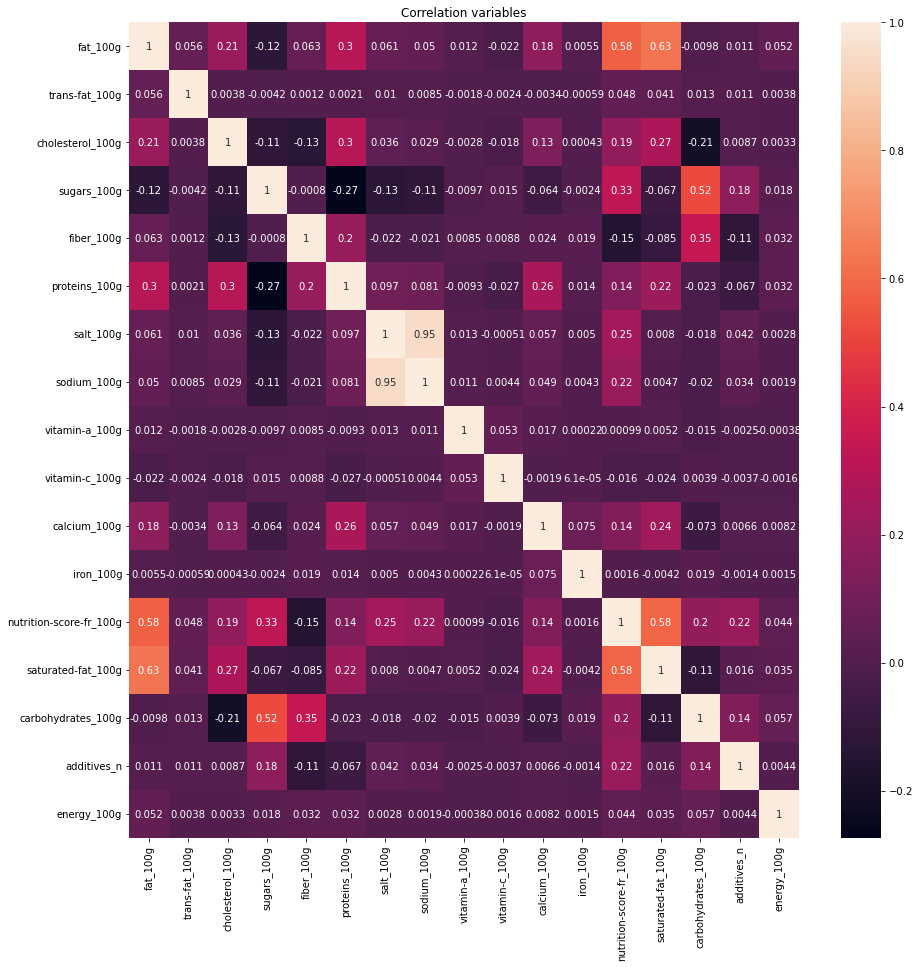

In [11]:
fig_dims = (15, 15)
plt.subplots(figsize=fig_dims)
sns.heatmap(heat, annot=True).set(title = "Correlation variables")
plt.show()

In [12]:
list(heat)

['fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'additives_n',
 'energy_100g']

Corrélation forte :  
1) Sodium & salt  
2) Saturated fat & fat  
3) Nutrition score & fat  
4) Carbohydrates & sugars  

Le sodium et le sel sont similaires, leur corrélation va de soi. Tout comme les carbohydrates qui sont inclus dans les sucres.  
Nous pouvons également constater une corrélation entre le nutriscore et les matières grasses qui sont mauvaises pour la prise de masse. Le nutriscore confirme pour le moment notre hypothèse.  
Les acides gras saturés et les matières grasses sont de la même famille, la corrélation est donc logique. 

In [13]:
vars_all_ok = vars_all_ok.loc[:,['fat_100g',
'trans-fat_100g',
'cholesterol_100g',
'sugars_100g',
'fiber_100g',
'proteins_100g',
'salt_100g',
'vitamin-a_100g',
'vitamin-c_100g',
'calcium_100g',
'iron_100g',
'nutrition-score-fr_100g',
'saturated-fat_100g',
'additives_n',
'energy_100g',
'product_name',
'ingredients_text',
'nutrition_grade_fr']]

vars_all_ok

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,additives_n,energy_100g,product_name,ingredients_text,nutrition_grade_fr
0,28.57,0.0,0.018,14.29,3.6,3.57,0.00000,0.000000,0.021400,0.000000,0.00129,14.0,28.57,0.000000,2243.0,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",d
1,17.86,0.0,0.000,17.86,7.1,17.86,0.63500,0.000000,0.000000,0.071000,0.00129,0.0,0.00,0.000000,1941.0,Peanuts,"Peanuts, wheat flour, sugar, rice flour, tapio...",b
2,18.75,0.0,0.000,15.62,9.4,14.06,0.13970,0.000000,0.002067,0.062000,0.00422,7.0,4.69,2.000000,1833.0,Organic Muesli,"Org oats, org hemp granola (org oats, evaporat...",c
3,36.67,0.0,0.000,3.33,6.7,16.67,1.60782,0.000067,0.000000,0.133000,0.00360,12.0,5.00,1.000000,2230.0,Zen Party Mix,"Roasted peanuts (peanuts, peanut or canola oil...",d
4,18.18,0.0,0.000,21.82,9.1,14.55,0.02286,0.000273,0.005467,0.072667,0.00131,0.0,1.82,0.000000,1824.0,Cinnamon Nut Granola,"Organic rolled oats, honey, raisins, almonds, ...",b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174819,0.00,0.0,0.000,2.35,4.7,1.18,0.03048,0.000000,0.000000,0.000000,0.00127,0.0,0.00,0.000000,1477.0,Natural Cassava,Cassava.,a
174820,2.80,0.0,0.000,2.60,5.9,13.00,0.68000,0.000000,0.000000,0.143000,0.00380,7.0,0.60,0.000000,1643.0,Tartines craquantes bio au sarrasin,NaN,a
174821,50.00,0.0,0.000,3.89,12.2,21.22,0.10000,0.000000,0.000700,0.202333,0.00493,0.0,3.73,0.333333,2406.0,Amandes,NaN,b
174822,0.20,0.0,0.000,0.50,0.2,0.50,0.02540,0.000004,0.002500,0.000000,0.00041,2.0,0.20,0.000000,21.0,Thé vert Earl grey,"thé vert, arôme naturel bergamote avec autres ...",c


# Analyses univariées 

Les variables importantes pour la prise de masse sont : les protéines, l'energie ainsi que les fibres. Nous allons donc porter nos analyses univariées sur ces trois composantes. Le taux de cholestérol élevé des aliments favorise également la prise de masse. Nous regardons également le nutrition score de ces aliments afin de ne séléctionner que les meilleurs. 

## Score by ingredient

Etablir un score par ingrédient permet de valoriser et de mettre en avant les meilleurs aliments pour la prise de masse mais également de pénaliser les aliments interdits. Nous allons donner des notes de a à d allant de la meilleure à la moins bonne. 

In [14]:
vars_all_ok['ingredients_text'] = vars_all_ok['ingredients_text'].str.lower()
vars_all_ok['ingredients_text'] = vars_all_ok['ingredients_text'].str.replace("_",",")
vars_all_ok['ingredients_text'] = vars_all_ok['ingredients_text'].str.replace("-",",")
vars_all_ok['ingredients_text'] = vars_all_ok['ingredients_text'].str.replace(".","")
vars_all_ok

/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,additives_n,energy_100g,product_name,ingredients_text,nutrition_grade_fr
0,28.57,0.0,0.018,14.29,3.6,3.57,0.00000,0.000000,0.021400,0.000000,0.00129,14.0,28.57,0.000000,2243.0,Banana Chips Sweetened (Whole),"bananas, vegetable oil (coconut oil, corn oil ...",d
1,17.86,0.0,0.000,17.86,7.1,17.86,0.63500,0.000000,0.000000,0.071000,0.00129,0.0,0.00,0.000000,1941.0,Peanuts,"peanuts, wheat flour, sugar, rice flour, tapio...",b
2,18.75,0.0,0.000,15.62,9.4,14.06,0.13970,0.000000,0.002067,0.062000,0.00422,7.0,4.69,2.000000,1833.0,Organic Muesli,"org oats, org hemp granola (org oats, evaporat...",c
3,36.67,0.0,0.000,3.33,6.7,16.67,1.60782,0.000067,0.000000,0.133000,0.00360,12.0,5.00,1.000000,2230.0,Zen Party Mix,"roasted peanuts (peanuts, peanut or canola oil...",d
4,18.18,0.0,0.000,21.82,9.1,14.55,0.02286,0.000273,0.005467,0.072667,0.00131,0.0,1.82,0.000000,1824.0,Cinnamon Nut Granola,"organic rolled oats, honey, raisins, almonds, ...",b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174819,0.00,0.0,0.000,2.35,4.7,1.18,0.03048,0.000000,0.000000,0.000000,0.00127,0.0,0.00,0.000000,1477.0,Natural Cassava,cassava,a
174820,2.80,0.0,0.000,2.60,5.9,13.00,0.68000,0.000000,0.000000,0.143000,0.00380,7.0,0.60,0.000000,1643.0,Tartines craquantes bio au sarrasin,NaN,a
174821,50.00,0.0,0.000,3.89,12.2,21.22,0.10000,0.000000,0.000700,0.202333,0.00493,0.0,3.73,0.333333,2406.0,Amandes,NaN,b
174822,0.20,0.0,0.000,0.50,0.2,0.50,0.02540,0.000004,0.002500,0.000000,0.00041,2.0,0.20,0.000000,21.0,Thé vert Earl grey,"thé vert, arôme naturel bergamote avec autres ...",c


In [15]:
vars_all_ok['ingredients_text'].unique().tolist()

['bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor',
 'peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch',
 'org oats, org hemp granola (org oats, evaporated cane juice, org expeller,pressed canola oil, crispy rice [org brown rice flour, org evaporated cane juice, org molasses, sea salt], org flax seeds, org oat solids, hemp seeds), org raisins, org dates, org almonds, org hazelnuts, org coconut, org sunflower seeds, org pumpkin seeds, org flax seeds, org corn flakes (org corn meal, org grape and/or pear juice concentrate, sea salt), org quinoa amaranth flakes (org corn meal, org yellow corn flour, org evaporated cane juice, org flax, org buckwheat flour, org quinoa, org amaranth, sea salt, tocopherols [natural vitamin e])',
 'roasted peanuts (peanuts, peanut or canola oil, salt), sesame sticks (unbleached wheat flour, sesame see

Methode 1.  
  
1) créer une colonne "has sugar" et remplie de 0   
2) vars_all_ok['ingredients_text'] = vars_all_ok['ingredients_text'].str.split(',')   
vars_all_ok  
3) faire un apply sur "has sugar" et si le mot sucre est présent dans la colonne "ingredient_text" alors on remplace 0 par 1 (0 -> 1) et sinon on renvoit 0  
  
ingredient_text['has sugar'] = 0  
ingredient_text  
  
def check_element(xline):  
    print(xline['ingredients_text'])  
    print("bananas" in xline['ingredients_text'])  
    if "bananas" in xline['ingredients_text'] :   
        return 1  
    else :   
        return 0   
mini_ingredient_text['has sugar'] = mini_ingredient_text.apply( check_element , axis = 1 )   
  
mini_ingredient_text  

In [16]:
vars_all_score = vars_all_ok.dropna()
searchforegg = ['egg', 'oeuf']
searchforchicken = ['chicken', 'poulet']
searchforbeef = ['beef', 'boeuf']
searchforcarrot = ['carrot', 'carotte']

vars_all_score["is salmon"] = vars_all_score["product_name"].apply(lambda x: 1 if "salmon" in x.lower() else 0)
vars_all_score["is tuna"] = vars_all_score["product_name"].apply(lambda x: 1 if "tuna" in x.lower() else 0)
vars_all_score["is Brown rice"] = vars_all_score["product_name"].apply(lambda x: 1 if "brown rice" in x.lower() else 0)
vars_all_score["is white rice"] = vars_all_score["product_name"].apply(lambda x: 1 if "tuna" in x.lower() else 0)
vars_all_score["is Red beans"] = vars_all_score["product_name"].apply(lambda x: 1 if "red beans" in x.lower() else 0)
vars_all_score["has eggs"] = vars_all_score["ingredients_text"].apply(lambda x: 1 if any(i in x.lower() for i in searchforegg) else 0)
vars_all_score["has tofu"] = vars_all_score["product_name"].apply(lambda x: 1 if "tofu" in x.lower() else 0)
vars_all_score["has soja"] = vars_all_score["ingredients_text"].apply(lambda x: 1 if "soja" in x.lower() else 0)
vars_all_score["has chicken"] = vars_all_score["ingredients_text"].apply(lambda x: 1 if any(i in x.lower() for i in searchforchicken) else 0)
vars_all_score["has mozza"] = vars_all_score["ingredients_text"].apply(lambda x: 1 if "mozza" in x.lower() else 0)
vars_all_score["has cream cheese"] = vars_all_score["ingredients_text"].apply(lambda x: 1 if "cream cheese" in x.lower() else 0)
vars_all_score["has beef"] = vars_all_score["ingredients_text"].apply(lambda x: 1 if "beef" in x.lower() else 0)
vars_all_score["has salmon"] = vars_all_score["ingredients_text"].apply(lambda x: 1 if "salmon" in x.lower() else 0)
vars_all_score["has tuna"] = vars_all_score["ingredients_text"].apply(lambda x: 1 if "tuna" in x.lower() else 0)
vars_all_score["has wheat flour"] = vars_all_score["ingredients_text"].apply(lambda x: 1 if "wheat flour" in x.lower() else 0)
vars_all_score["has Red beans"] = vars_all_score["ingredients_text"].apply(lambda x: 1 if "red bean" in x.lower() else 0)
vars_all_score["has Oatmeal"] = vars_all_score["ingredients_text"].apply(lambda x: 1 if "oatmeal" in x.lower() else 0)
vars_all_score["has Brown rice"] = vars_all_score["ingredients_text"].apply(lambda x: 1 if "brown rice" in x.lower() else 0)
vars_all_score["has white rice"] = vars_all_score["ingredients_text"].apply(lambda x: -1 if "white rice" in x.lower() else 0)
vars_all_score["has Alcohol"] = vars_all_score["ingredients_text"].apply(lambda x: -1 if "alcohol" in x.lower() else 0)
vars_all_score["has sugar"] = vars_all_score["ingredients_text"].apply(lambda x: -1 if "sugar" in x.lower() else 0)
vars_all_score["has banana"] = vars_all_score["ingredients_text"].apply(lambda x: 1 if "banan" in x.lower() else 0)
vars_all_score["has carrot"] = vars_all_score["ingredients_text"].apply(lambda x: 1 if any(i in x.lower() for i in searchforcarrot) else 0)
vars_all_score["is sugar free"] = vars_all_score["ingredients_text"].apply(lambda x: 2 if "sugar free" in x.lower() else 0)
vars_all_score

/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,additives_n,energy_100g,product_name,ingredients_text,nutrition_grade_fr,is salmon,is tuna,is Brown rice,is white rice,is Red beans,has eggs,has tofu,has soja,has chicken,has mozza,has cream cheese,has beef,has salmon,has tuna,has wheat flour,has Red beans,has Oatmeal,has Brown rice,has white rice,has Alcohol,has sugar,has banana,has carrot,is sugar free
0,28.57,0.0,0.018000,14.29,3.6,3.57,0.00000,0.000000,0.021400,0.000000,0.00129,14.0,28.57,0.0,2243.0,Banana Chips Sweetened (Whole),"bananas, vegetable oil (coconut oil, corn oil ...",d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1,0,0
1,17.86,0.0,0.000000,17.86,7.1,17.86,0.63500,0.000000,0.000000,0.071000,0.00129,0.0,0.00,0.0,1941.0,Peanuts,"peanuts, wheat flour, sugar, rice flour, tapio...",b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1,0,0,0
2,18.75,0.0,0.000000,15.62,9.4,14.06,0.13970,0.000000,0.002067,0.062000,0.00422,7.0,4.69,2.0,1833.0,Organic Muesli,"org oats, org hemp granola (org oats, evaporat...",c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,36.67,0.0,0.000000,3.33,6.7,16.67,1.60782,0.000067,0.000000,0.133000,0.00360,12.0,5.00,1.0,2230.0,Zen Party Mix,"roasted peanuts (peanuts, peanut or canola oil...",d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,18.18,0.0,0.000000,21.82,9.1,14.55,0.02286,0.000273,0.005467,0.072667,0.00131,0.0,1.82,0.0,1824.0,Cinnamon Nut Granola,"organic rolled oats, honey, raisins, almonds, ...",b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174813,6.90,0.0,0.055333,16.70,0.6,0.30,0.54102,0.000083,0.000000,0.111667,0.00020,6.0,0.50,1.0,660.0,Santa Cruz Chilli & Lime Dressing,"water, sugar, rice wine vinegar (contains sulp...",c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0
174816,9.72,0.0,0.000000,30.56,8.3,5.56,0.95250,0.000250,0.058300,0.556000,0.00500,11.0,2.78,1.0,1393.0,Organic Z Bar,"organic oat blend (organic rolled oats, organi...",d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174819,0.00,0.0,0.000000,2.35,4.7,1.18,0.03048,0.000000,0.000000,0.000000,0.00127,0.0,0.00,0.0,1477.0,Natural Cassava,cassava,a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174822,0.20,0.0,0.000000,0.50,0.2,0.50,0.02540,0.000004,0.002500,0.000000,0.00041,2.0,0.20,0.0,21.0,Thé vert Earl grey,"thé vert, arôme naturel bergamote avec autres ...",c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
vars_all_score["points_ingredients"] = vars_all_score.loc[:,"is salmon":"is sugar free"].sum(axis=1)
vars_all_score

/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,additives_n,energy_100g,product_name,ingredients_text,nutrition_grade_fr,is salmon,is tuna,is Brown rice,is white rice,is Red beans,has eggs,has tofu,has soja,has chicken,has mozza,has cream cheese,has beef,has salmon,has tuna,has wheat flour,has Red beans,has Oatmeal,has Brown rice,has white rice,has Alcohol,has sugar,has banana,has carrot,is sugar free,points_ingredients
0,28.57,0.0,0.018000,14.29,3.6,3.57,0.00000,0.000000,0.021400,0.000000,0.00129,14.0,28.57,0.0,2243.0,Banana Chips Sweetened (Whole),"bananas, vegetable oil (coconut oil, corn oil ...",d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1,0,0,0
1,17.86,0.0,0.000000,17.86,7.1,17.86,0.63500,0.000000,0.000000,0.071000,0.00129,0.0,0.00,0.0,1941.0,Peanuts,"peanuts, wheat flour, sugar, rice flour, tapio...",b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1,0,0,0,0
2,18.75,0.0,0.000000,15.62,9.4,14.06,0.13970,0.000000,0.002067,0.062000,0.00422,7.0,4.69,2.0,1833.0,Organic Muesli,"org oats, org hemp granola (org oats, evaporat...",c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2
3,36.67,0.0,0.000000,3.33,6.7,16.67,1.60782,0.000067,0.000000,0.133000,0.00360,12.0,5.00,1.0,2230.0,Zen Party Mix,"roasted peanuts (peanuts, peanut or canola oil...",d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2
4,18.18,0.0,0.000000,21.82,9.1,14.55,0.02286,0.000273,0.005467,0.072667,0.00131,0.0,1.82,0.0,1824.0,Cinnamon Nut Granola,"organic rolled oats, honey, raisins, almonds, ...",b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174813,6.90,0.0,0.055333,16.70,0.6,0.30,0.54102,0.000083,0.000000,0.111667,0.00020,6.0,0.50,1.0,660.0,Santa Cruz Chilli & Lime Dressing,"water, sugar, rice wine vinegar (contains sulp...",c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,-1
174816,9.72,0.0,0.000000,30.56,8.3,5.56,0.95250,0.000250,0.058300,0.556000,0.00500,11.0,2.78,1.0,1393.0,Organic Z Bar,"organic oat blend (organic rolled oats, organi...",d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174819,0.00,0.0,0.000000,2.35,4.7,1.18,0.03048,0.000000,0.000000,0.000000,0.00127,0.0,0.00,0.0,1477.0,Natural Cassava,cassava,a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174822,0.20,0.0,0.000000,0.50,0.2,0.50,0.02540,0.000004,0.002500,0.000000,0.00041,2.0,0.20,0.0,21.0,Thé vert Earl grey,"thé vert, arôme naturel bergamote avec autres ...",c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


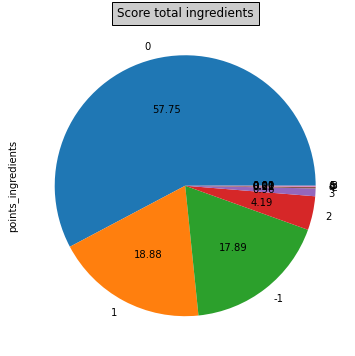

In [18]:
vars_all_score["points_ingredients"].value_counts(normalize=True).plot(kind='pie', figsize = (8, 6), autopct = '%.2f')
plt.title("Score total ingredients", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

In [19]:
def QR (row):
   if row["points_ingredients"] == 0 :
      return 'c' 
   if 0 < row["points_ingredients"] < 2 :
      return 'b' 
   if row["points_ingredients"] < 0 :
      return 'd' 
   if row["points_ingredients"] >= 2 :
      return 'a'

vars_all_score["score_ingredients"] = vars_all_score.apply (lambda row: QR (row),axis=1)
vars_all_score

/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,additives_n,energy_100g,product_name,ingredients_text,nutrition_grade_fr,is salmon,is tuna,is Brown rice,is white rice,is Red beans,has eggs,has tofu,has soja,has chicken,has mozza,has cream cheese,has beef,has salmon,has tuna,has wheat flour,has Red beans,has Oatmeal,has Brown rice,has white rice,has Alcohol,has sugar,has banana,has carrot,is sugar free,points_ingredients,score_ingredients
0,28.57,0.0,0.018000,14.29,3.6,3.57,0.00000,0.000000,0.021400,0.000000,0.00129,14.0,28.57,0.0,2243.0,Banana Chips Sweetened (Whole),"bananas, vegetable oil (coconut oil, corn oil ...",d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1,0,0,0,c
1,17.86,0.0,0.000000,17.86,7.1,17.86,0.63500,0.000000,0.000000,0.071000,0.00129,0.0,0.00,0.0,1941.0,Peanuts,"peanuts, wheat flour, sugar, rice flour, tapio...",b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1,0,0,0,0,c
2,18.75,0.0,0.000000,15.62,9.4,14.06,0.13970,0.000000,0.002067,0.062000,0.00422,7.0,4.69,2.0,1833.0,Organic Muesli,"org oats, org hemp granola (org oats, evaporat...",c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,a
3,36.67,0.0,0.000000,3.33,6.7,16.67,1.60782,0.000067,0.000000,0.133000,0.00360,12.0,5.00,1.0,2230.0,Zen Party Mix,"roasted peanuts (peanuts, peanut or canola oil...",d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,a
4,18.18,0.0,0.000000,21.82,9.1,14.55,0.02286,0.000273,0.005467,0.072667,0.00131,0.0,1.82,0.0,1824.0,Cinnamon Nut Granola,"organic rolled oats, honey, raisins, almonds, ...",b,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174813,6.90,0.0,0.055333,16.70,0.6,0.30,0.54102,0.000083,0.000000,0.111667,0.00020,6.0,0.50,1.0,660.0,Santa Cruz Chilli & Lime Dressing,"water, sugar, rice wine vinegar (contains sulp...",c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,-1,d
174816,9.72,0.0,0.000000,30.56,8.3,5.56,0.95250,0.000250,0.058300,0.556000,0.00500,11.0,2.78,1.0,1393.0,Organic Z Bar,"organic oat blend (organic rolled oats, organi...",d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,c
174819,0.00,0.0,0.000000,2.35,4.7,1.18,0.03048,0.000000,0.000000,0.000000,0.00127,0.0,0.00,0.0,1477.0,Natural Cassava,cassava,a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,c
174822,0.20,0.0,0.000000,0.50,0.2,0.50,0.02540,0.000004,0.002500,0.000000,0.00041,2.0,0.20,0.0,21.0,Thé vert Earl grey,"thé vert, arôme naturel bergamote avec autres ...",c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,c


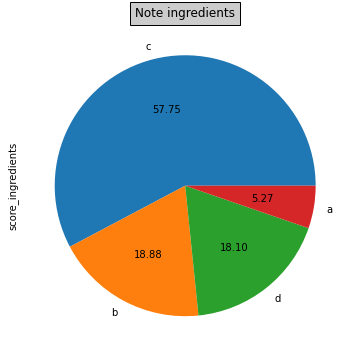

In [20]:
vars_all_score["score_ingredients"].value_counts(normalize=True).plot(kind='pie', figsize = (8, 6), autopct = '%.2f')
plt.title("Note ingredients", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

## Scoring by proteins

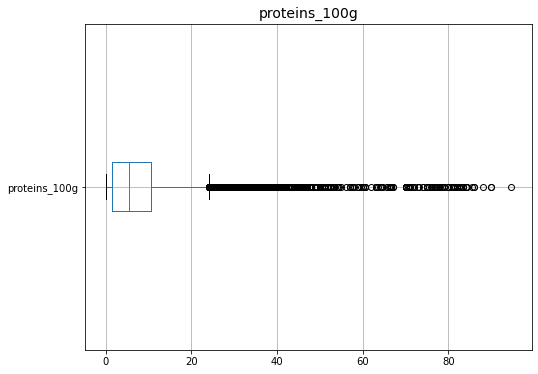

In [21]:
plt.figure(figsize=(8,6))
plt.title('proteins_100g',fontsize=14) 
vars_all_ok.boxplot(column="proteins_100g", vert=False,showfliers=True)
plt.show()

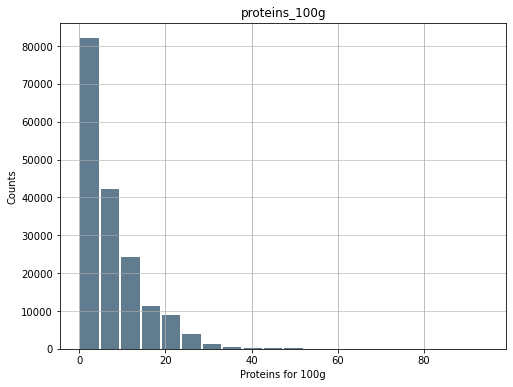

In [22]:
commutes = vars_all_ok["proteins_100g"]
plt.figure(figsize=(8, 6))
commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('proteins_100g')
plt.ylabel('Counts')
plt.xlabel('Proteins for 100g')
plt.grid(axis='y', alpha=0.75)

In [23]:
vars_all_ok['proteins_100g'].describe()

count    174824.000000
mean          7.236850
std           7.321852
min           0.000000
25%           1.600000
50%           5.360000
75%          10.640000
max          94.700000
Name: proteins_100g, dtype: float64

In [24]:
def QR (row):
   if row["proteins_100g"] < 10 :
      return 'd' 
   if 10 <= row["proteins_100g"] < 15 :
      return 'c' 
   if 15 <= row["proteins_100g"] < 25 :
      return 'b' 
   if row["proteins_100g"] >= 25 :
      return 'a'
    
vars_all_ok['score_proteins'] = vars_all_ok.apply (lambda row: QR (row),axis=1)
vars_all_ok

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,additives_n,energy_100g,product_name,ingredients_text,nutrition_grade_fr,score_proteins
0,28.57,0.0,0.018,14.29,3.6,3.57,0.00000,0.000000,0.021400,0.000000,0.00129,14.0,28.57,0.000000,2243.0,Banana Chips Sweetened (Whole),"bananas, vegetable oil (coconut oil, corn oil ...",d,d
1,17.86,0.0,0.000,17.86,7.1,17.86,0.63500,0.000000,0.000000,0.071000,0.00129,0.0,0.00,0.000000,1941.0,Peanuts,"peanuts, wheat flour, sugar, rice flour, tapio...",b,b
2,18.75,0.0,0.000,15.62,9.4,14.06,0.13970,0.000000,0.002067,0.062000,0.00422,7.0,4.69,2.000000,1833.0,Organic Muesli,"org oats, org hemp granola (org oats, evaporat...",c,c
3,36.67,0.0,0.000,3.33,6.7,16.67,1.60782,0.000067,0.000000,0.133000,0.00360,12.0,5.00,1.000000,2230.0,Zen Party Mix,"roasted peanuts (peanuts, peanut or canola oil...",d,b
4,18.18,0.0,0.000,21.82,9.1,14.55,0.02286,0.000273,0.005467,0.072667,0.00131,0.0,1.82,0.000000,1824.0,Cinnamon Nut Granola,"organic rolled oats, honey, raisins, almonds, ...",b,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174819,0.00,0.0,0.000,2.35,4.7,1.18,0.03048,0.000000,0.000000,0.000000,0.00127,0.0,0.00,0.000000,1477.0,Natural Cassava,cassava,a,d
174820,2.80,0.0,0.000,2.60,5.9,13.00,0.68000,0.000000,0.000000,0.143000,0.00380,7.0,0.60,0.000000,1643.0,Tartines craquantes bio au sarrasin,NaN,a,c
174821,50.00,0.0,0.000,3.89,12.2,21.22,0.10000,0.000000,0.000700,0.202333,0.00493,0.0,3.73,0.333333,2406.0,Amandes,NaN,b,b
174822,0.20,0.0,0.000,0.50,0.2,0.50,0.02540,0.000004,0.002500,0.000000,0.00041,2.0,0.20,0.000000,21.0,Thé vert Earl grey,"thé vert, arôme naturel bergamote avec autres ...",c,d


In [25]:
quantile_1 = np.percentile(vars_all_ok.proteins_100g, 25)
quantile_2 = np.percentile(vars_all_ok.proteins_100g, 50)
quantile_3 = np.percentile(vars_all_ok.proteins_100g, 75)

def QR (row):
   if row['proteins_100g'] < quantile_1 :
      return 'd'
   if row['proteins_100g'] >= quantile_1 and row['proteins_100g'] < quantile_2 :
      return 'c'
   if row['proteins_100g'] >= quantile_2 and row['proteins_100g'] < quantile_3 :
      return 'b'
   if row['proteins_100g'] >= quantile_3 :
      return 'a'
    
vars_all_ok['score_proteins_%'] = vars_all_ok.apply (lambda row: QR (row),axis=1)
vars_all_ok

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,additives_n,energy_100g,product_name,ingredients_text,nutrition_grade_fr,score_proteins,score_proteins_%
0,28.57,0.0,0.018,14.29,3.6,3.57,0.00000,0.000000,0.021400,0.000000,0.00129,14.0,28.57,0.000000,2243.0,Banana Chips Sweetened (Whole),"bananas, vegetable oil (coconut oil, corn oil ...",d,d,c
1,17.86,0.0,0.000,17.86,7.1,17.86,0.63500,0.000000,0.000000,0.071000,0.00129,0.0,0.00,0.000000,1941.0,Peanuts,"peanuts, wheat flour, sugar, rice flour, tapio...",b,b,a
2,18.75,0.0,0.000,15.62,9.4,14.06,0.13970,0.000000,0.002067,0.062000,0.00422,7.0,4.69,2.000000,1833.0,Organic Muesli,"org oats, org hemp granola (org oats, evaporat...",c,c,a
3,36.67,0.0,0.000,3.33,6.7,16.67,1.60782,0.000067,0.000000,0.133000,0.00360,12.0,5.00,1.000000,2230.0,Zen Party Mix,"roasted peanuts (peanuts, peanut or canola oil...",d,b,a
4,18.18,0.0,0.000,21.82,9.1,14.55,0.02286,0.000273,0.005467,0.072667,0.00131,0.0,1.82,0.000000,1824.0,Cinnamon Nut Granola,"organic rolled oats, honey, raisins, almonds, ...",b,c,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174819,0.00,0.0,0.000,2.35,4.7,1.18,0.03048,0.000000,0.000000,0.000000,0.00127,0.0,0.00,0.000000,1477.0,Natural Cassava,cassava,a,d,d
174820,2.80,0.0,0.000,2.60,5.9,13.00,0.68000,0.000000,0.000000,0.143000,0.00380,7.0,0.60,0.000000,1643.0,Tartines craquantes bio au sarrasin,NaN,a,c,a
174821,50.00,0.0,0.000,3.89,12.2,21.22,0.10000,0.000000,0.000700,0.202333,0.00493,0.0,3.73,0.333333,2406.0,Amandes,NaN,b,b,a
174822,0.20,0.0,0.000,0.50,0.2,0.50,0.02540,0.000004,0.002500,0.000000,0.00041,2.0,0.20,0.000000,21.0,Thé vert Earl grey,"thé vert, arôme naturel bergamote avec autres ...",c,d,d


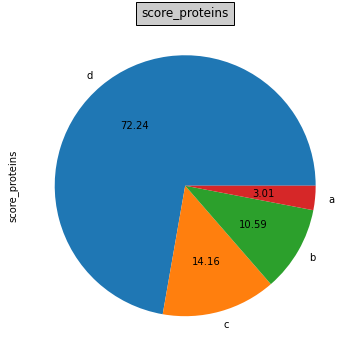

In [26]:
vars_all_ok["score_proteins"].value_counts(normalize=True).plot(kind='pie', figsize = (8, 6), autopct = '%.2f')
plt.title("score_proteins", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Nous constatons que peu d'aliments sont riches en protéines.

## Scoring by fiber

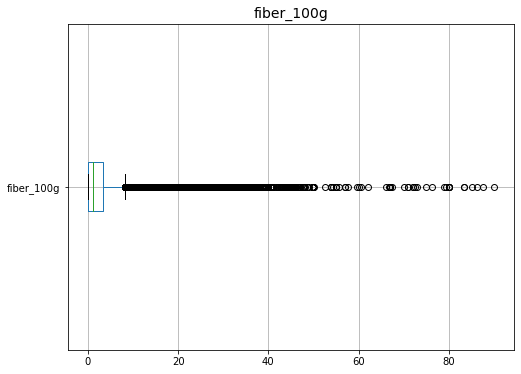

In [27]:
plt.figure(figsize=(8,6))
plt.title('fiber_100g',fontsize=14) 
vars_all_ok.boxplot(column="fiber_100g", vert=False,showfliers=True)
plt.show()

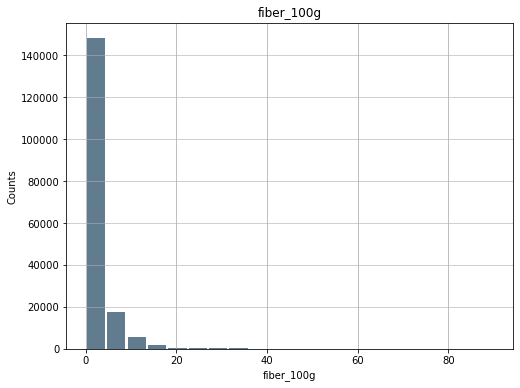

In [28]:
commutes = vars_all_ok["fiber_100g"]
plt.figure(figsize=(8, 6))
commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('fiber_100g')
plt.ylabel('Counts')
plt.xlabel('fiber_100g')
plt.grid(axis='y', alpha=0.75)

In [29]:
vars_all_ok['fiber_100g'].describe()

count    174824.000000
mean          2.405866
std           4.119988
min           0.000000
25%           0.000000
50%           1.200000
75%           3.300000
max          90.000000
Name: fiber_100g, dtype: float64

/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


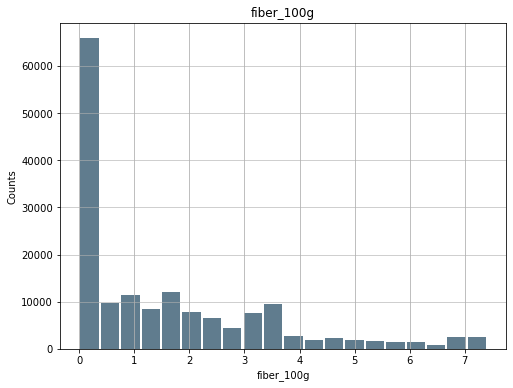

In [30]:
fiber_100g = vars_all_ok['fiber_100g']
filtered_fiber_100g = fiber_100g[~is_outlier(fiber_100g)]

commutes = filtered_fiber_100g
plt.figure(figsize=(8, 6))
commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('fiber_100g')
plt.ylabel('Counts')
plt.xlabel('fiber_100g')
plt.grid(axis='y', alpha=0.75)

In [31]:
def QR (row):
   if row["fiber_100g"] < 5 :
      return 'd' 
   if 5 <= row["fiber_100g"] < 10 :
      return 'c' 
   if 10 <= row["fiber_100g"] < 15 :
      return 'b' 
   if row["fiber_100g"] >= 15 :
      return 'a'
    
vars_all_ok['score_fiber'] = vars_all_ok.apply (lambda row: QR (row),axis=1)
vars_all_ok

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,additives_n,energy_100g,product_name,ingredients_text,nutrition_grade_fr,score_proteins,score_proteins_%,score_fiber
0,28.57,0.0,0.018,14.29,3.6,3.57,0.00000,0.000000,0.021400,0.000000,0.00129,14.0,28.57,0.000000,2243.0,Banana Chips Sweetened (Whole),"bananas, vegetable oil (coconut oil, corn oil ...",d,d,c,d
1,17.86,0.0,0.000,17.86,7.1,17.86,0.63500,0.000000,0.000000,0.071000,0.00129,0.0,0.00,0.000000,1941.0,Peanuts,"peanuts, wheat flour, sugar, rice flour, tapio...",b,b,a,c
2,18.75,0.0,0.000,15.62,9.4,14.06,0.13970,0.000000,0.002067,0.062000,0.00422,7.0,4.69,2.000000,1833.0,Organic Muesli,"org oats, org hemp granola (org oats, evaporat...",c,c,a,c
3,36.67,0.0,0.000,3.33,6.7,16.67,1.60782,0.000067,0.000000,0.133000,0.00360,12.0,5.00,1.000000,2230.0,Zen Party Mix,"roasted peanuts (peanuts, peanut or canola oil...",d,b,a,c
4,18.18,0.0,0.000,21.82,9.1,14.55,0.02286,0.000273,0.005467,0.072667,0.00131,0.0,1.82,0.000000,1824.0,Cinnamon Nut Granola,"organic rolled oats, honey, raisins, almonds, ...",b,c,a,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174819,0.00,0.0,0.000,2.35,4.7,1.18,0.03048,0.000000,0.000000,0.000000,0.00127,0.0,0.00,0.000000,1477.0,Natural Cassava,cassava,a,d,d,d
174820,2.80,0.0,0.000,2.60,5.9,13.00,0.68000,0.000000,0.000000,0.143000,0.00380,7.0,0.60,0.000000,1643.0,Tartines craquantes bio au sarrasin,NaN,a,c,a,c
174821,50.00,0.0,0.000,3.89,12.2,21.22,0.10000,0.000000,0.000700,0.202333,0.00493,0.0,3.73,0.333333,2406.0,Amandes,NaN,b,b,a,b
174822,0.20,0.0,0.000,0.50,0.2,0.50,0.02540,0.000004,0.002500,0.000000,0.00041,2.0,0.20,0.000000,21.0,Thé vert Earl grey,"thé vert, arôme naturel bergamote avec autres ...",c,d,d,d


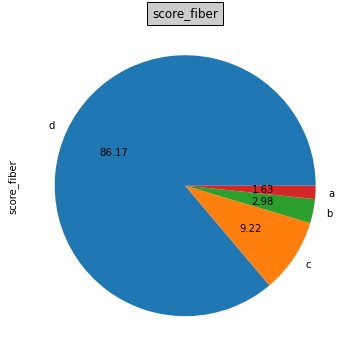

In [32]:
vars_all_ok["score_fiber"].value_counts(normalize=True).plot(kind='pie', figsize = (8, 6), autopct = '%.2f')
plt.title("score_fiber", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Peu d’aliments sont riches en fibres avec 86% de note d.

## Scoring by energy

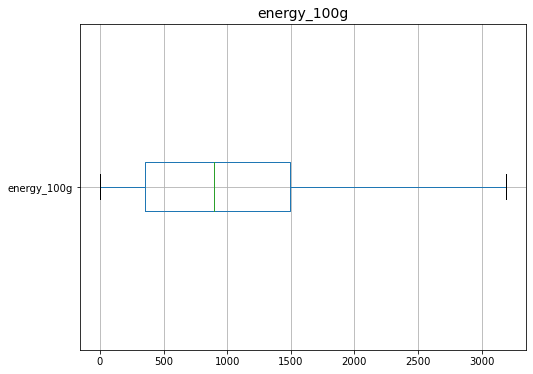

In [33]:
plt.figure(figsize=(8,6))
plt.title('energy_100g',fontsize=14) 
vars_all_ok.boxplot(column="energy_100g", vert=False,showfliers=False)
plt.show()

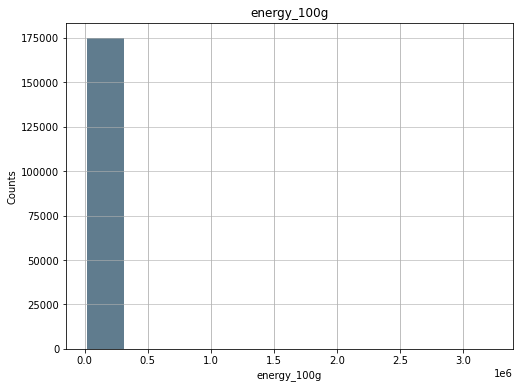

In [34]:
commutes = vars_all_ok["energy_100g"]
plt.figure(figsize=(8, 6))
commutes.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('energy_100g')
plt.ylabel('Counts')
plt.xlabel('energy_100g')
plt.grid(axis='y', alpha=0.75)

In [35]:
vars_all_ok['energy_100g'].describe()

count    1.748240e+05
mean     9.755712e+02
std      7.839684e+03
min      0.000000e+00
25%      3.560000e+02
50%      8.950000e+02
75%      1.490000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64

/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


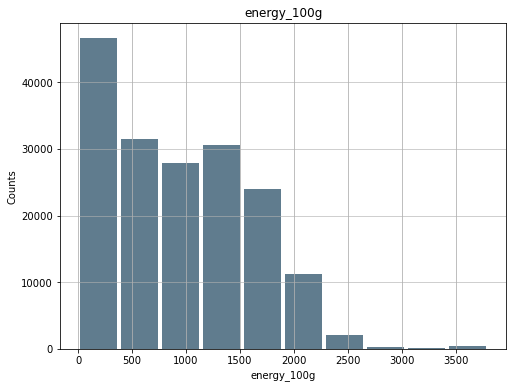

In [36]:
energy_100g = vars_all_ok['energy_100g']
filtered_energy_100g = energy_100g[~is_outlier(energy_100g)]

commutes = filtered_energy_100g
plt.figure(figsize=(8, 6))
commutes.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('energy_100g')
plt.ylabel('Counts')
plt.xlabel('energy_100g')
plt.grid(axis='y', alpha=0.75)

In [37]:
quantile_1p = np.percentile(vars_all_ok.energy_100g, 25)
quantile_2p = np.percentile(vars_all_ok.energy_100g, 50)
quantile_3p = np.percentile(vars_all_ok.energy_100g, 75)

def QR (row):
   if row['energy_100g'] < quantile_1p :
      return 'd'
   if row['energy_100g'] >= quantile_1p and row['energy_100g'] < quantile_2p :
      return 'c'
   if row['energy_100g'] >= quantile_2p and row['energy_100g'] < quantile_3p :
      return 'b'
   if row['energy_100g'] >= quantile_3p :
      return 'a'
    
vars_all_ok['score_energy_quantile'] = vars_all_ok.apply (lambda row: QR (row),axis=1)
vars_all_ok

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,additives_n,energy_100g,product_name,ingredients_text,nutrition_grade_fr,score_proteins,score_proteins_%,score_fiber,score_energy_quantile
0,28.57,0.0,0.018,14.29,3.6,3.57,0.00000,0.000000,0.021400,0.000000,0.00129,14.0,28.57,0.000000,2243.0,Banana Chips Sweetened (Whole),"bananas, vegetable oil (coconut oil, corn oil ...",d,d,c,d,a
1,17.86,0.0,0.000,17.86,7.1,17.86,0.63500,0.000000,0.000000,0.071000,0.00129,0.0,0.00,0.000000,1941.0,Peanuts,"peanuts, wheat flour, sugar, rice flour, tapio...",b,b,a,c,a
2,18.75,0.0,0.000,15.62,9.4,14.06,0.13970,0.000000,0.002067,0.062000,0.00422,7.0,4.69,2.000000,1833.0,Organic Muesli,"org oats, org hemp granola (org oats, evaporat...",c,c,a,c,a
3,36.67,0.0,0.000,3.33,6.7,16.67,1.60782,0.000067,0.000000,0.133000,0.00360,12.0,5.00,1.000000,2230.0,Zen Party Mix,"roasted peanuts (peanuts, peanut or canola oil...",d,b,a,c,a
4,18.18,0.0,0.000,21.82,9.1,14.55,0.02286,0.000273,0.005467,0.072667,0.00131,0.0,1.82,0.000000,1824.0,Cinnamon Nut Granola,"organic rolled oats, honey, raisins, almonds, ...",b,c,a,c,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174819,0.00,0.0,0.000,2.35,4.7,1.18,0.03048,0.000000,0.000000,0.000000,0.00127,0.0,0.00,0.000000,1477.0,Natural Cassava,cassava,a,d,d,d,b
174820,2.80,0.0,0.000,2.60,5.9,13.00,0.68000,0.000000,0.000000,0.143000,0.00380,7.0,0.60,0.000000,1643.0,Tartines craquantes bio au sarrasin,NaN,a,c,a,c,a
174821,50.00,0.0,0.000,3.89,12.2,21.22,0.10000,0.000000,0.000700,0.202333,0.00493,0.0,3.73,0.333333,2406.0,Amandes,NaN,b,b,a,b,a
174822,0.20,0.0,0.000,0.50,0.2,0.50,0.02540,0.000004,0.002500,0.000000,0.00041,2.0,0.20,0.000000,21.0,Thé vert Earl grey,"thé vert, arôme naturel bergamote avec autres ...",c,d,d,d,d


In [38]:
def QR (row):
   if row["energy_100g"] < 500 :
      return 'd' 
   if 500 <= row["energy_100g"] < 1000 :
      return 'c' 
   if 1000 <= row["energy_100g"] < 1700 :
      return 'b' 
   if row["energy_100g"] >= 1700 :
      return 'a'
    
vars_all_ok['score_energy_100g'] = vars_all_ok.apply (lambda row: QR (row),axis=1)
vars_all_ok

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,additives_n,energy_100g,product_name,ingredients_text,nutrition_grade_fr,score_proteins,score_proteins_%,score_fiber,score_energy_quantile,score_energy_100g
0,28.57,0.0,0.018,14.29,3.6,3.57,0.00000,0.000000,0.021400,0.000000,0.00129,14.0,28.57,0.000000,2243.0,Banana Chips Sweetened (Whole),"bananas, vegetable oil (coconut oil, corn oil ...",d,d,c,d,a,a
1,17.86,0.0,0.000,17.86,7.1,17.86,0.63500,0.000000,0.000000,0.071000,0.00129,0.0,0.00,0.000000,1941.0,Peanuts,"peanuts, wheat flour, sugar, rice flour, tapio...",b,b,a,c,a,a
2,18.75,0.0,0.000,15.62,9.4,14.06,0.13970,0.000000,0.002067,0.062000,0.00422,7.0,4.69,2.000000,1833.0,Organic Muesli,"org oats, org hemp granola (org oats, evaporat...",c,c,a,c,a,a
3,36.67,0.0,0.000,3.33,6.7,16.67,1.60782,0.000067,0.000000,0.133000,0.00360,12.0,5.00,1.000000,2230.0,Zen Party Mix,"roasted peanuts (peanuts, peanut or canola oil...",d,b,a,c,a,a
4,18.18,0.0,0.000,21.82,9.1,14.55,0.02286,0.000273,0.005467,0.072667,0.00131,0.0,1.82,0.000000,1824.0,Cinnamon Nut Granola,"organic rolled oats, honey, raisins, almonds, ...",b,c,a,c,a,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174819,0.00,0.0,0.000,2.35,4.7,1.18,0.03048,0.000000,0.000000,0.000000,0.00127,0.0,0.00,0.000000,1477.0,Natural Cassava,cassava,a,d,d,d,b,b
174820,2.80,0.0,0.000,2.60,5.9,13.00,0.68000,0.000000,0.000000,0.143000,0.00380,7.0,0.60,0.000000,1643.0,Tartines craquantes bio au sarrasin,NaN,a,c,a,c,a,b
174821,50.00,0.0,0.000,3.89,12.2,21.22,0.10000,0.000000,0.000700,0.202333,0.00493,0.0,3.73,0.333333,2406.0,Amandes,NaN,b,b,a,b,a,a
174822,0.20,0.0,0.000,0.50,0.2,0.50,0.02540,0.000004,0.002500,0.000000,0.00041,2.0,0.20,0.000000,21.0,Thé vert Earl grey,"thé vert, arôme naturel bergamote avec autres ...",c,d,d,d,d,d


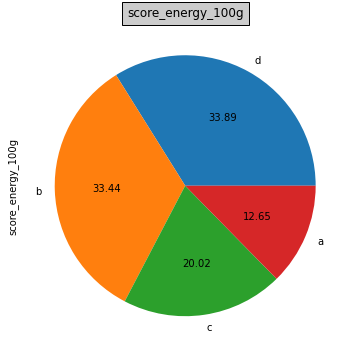

In [39]:
vars_all_ok["score_energy_100g"].value_counts(normalize=True).plot(kind='pie', figsize = (8, 6), autopct = '%.2f')
plt.title("score_energy_100g", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Un grand nombre d’aliments fournissent une énergie importante : 13% de a et 34% de d.

## Scoring by nutriscore

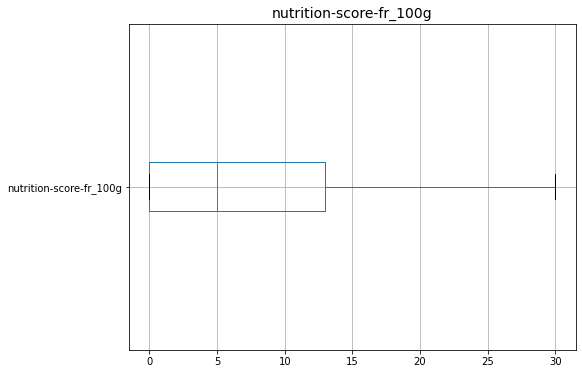

In [40]:
plt.figure(figsize=(8,6))
plt.title('nutrition-score-fr_100g',fontsize=14) 
vars_all_ok.boxplot(column="nutrition-score-fr_100g", vert=False,showfliers=True)
plt.show()

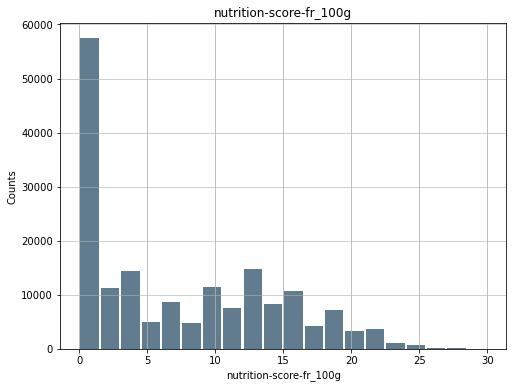

In [41]:
commutes = vars_all_ok["nutrition-score-fr_100g"]
plt.figure(figsize=(8, 6))
commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('nutrition-score-fr_100g')
plt.ylabel('Counts')
plt.xlabel('nutrition-score-fr_100g')
plt.grid(axis='y', alpha=0.75)

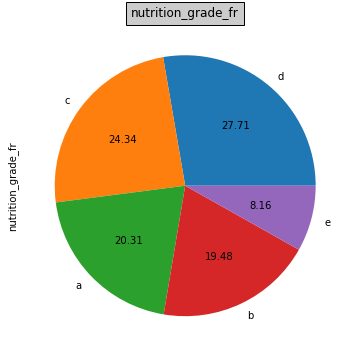

In [42]:
vars_all_ok["nutrition_grade_fr"].value_counts(normalize=True).plot(kind='pie', figsize = (8, 6), autopct = '%.2f')
plt.title("nutrition_grade_fr", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Le score nutrition est mauvais pour peu d'aliments, il semblerait donc qu'il soit tout à fait possible de se concentrer sur une prisse de masse en consommant des aliments de bonne qualité nutritionnelle. 

# Analyses bivariées 

### Score ingredient

In [43]:
filtered = vars_all_ok.copy()

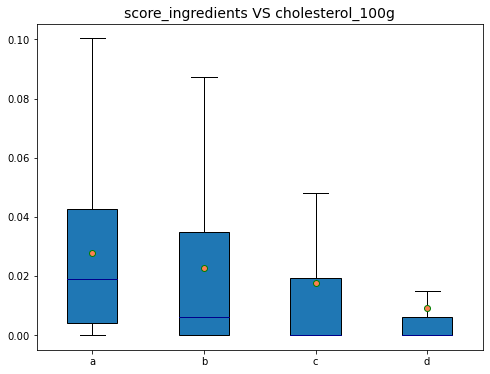

In [101]:
vars_all_score = vars_all_score.sort_values(by = 'score_ingredients', ascending = True)
X = "score_ingredients" # qualitative
Y = "cholesterol_100g" # quantitative

modalites = vars_all_score[X].unique()
groupes = []
for m in modalites:
    groupes.append(vars_all_score[vars_all_score[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('score_ingredients VS cholesterol_100g',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [102]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(vars_all_score[X],vars_all_score[Y])

0.008773068292382691

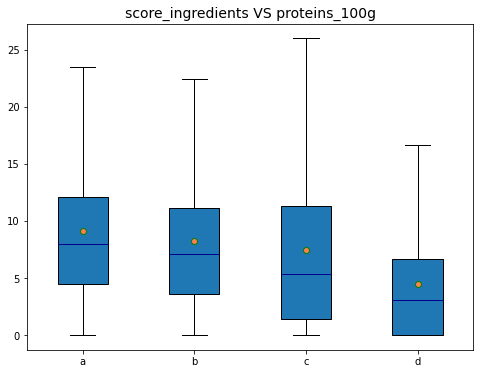

In [44]:
vars_all_score = vars_all_score.sort_values(by = 'score_ingredients', ascending = True)
X = "score_ingredients" # qualitative
Y = "proteins_100g" # quantitative

modalites = vars_all_score[X].unique()
groupes = []
for m in modalites:
    groupes.append(vars_all_score[vars_all_score[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('score_ingredients VS proteins_100g',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [45]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(vars_all_score[X],vars_all_score[Y])

0.03434029220066144

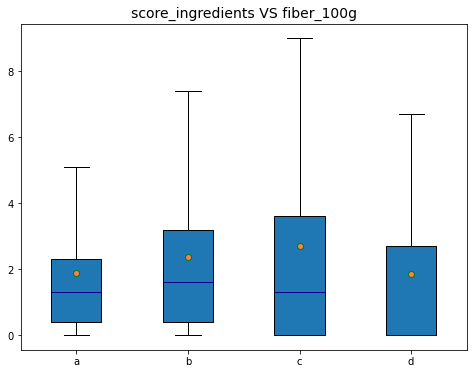

In [46]:
vars_all_score = vars_all_score.sort_values(by = 'score_ingredients', ascending = True)
X = "score_ingredients" # qualitative
Y = "fiber_100g" # quantitative

modalites = vars_all_score[X].unique()
groupes = []
for m in modalites:
    groupes.append(vars_all_score[vars_all_score[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('score_ingredients VS fiber_100g',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [47]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(vars_all_score[X],vars_all_score[Y])

0.007062597154348693

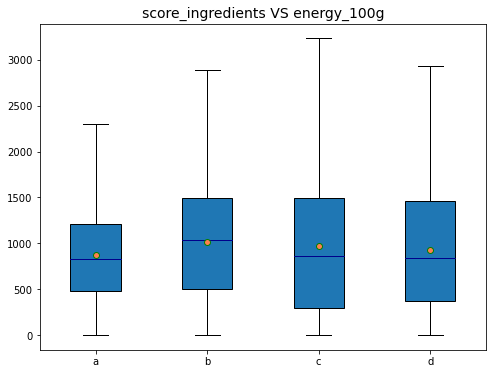

In [48]:
vars_all_score = vars_all_score.sort_values(by = 'score_ingredients', ascending = True)
X = "score_ingredients" # qualitative
Y = "energy_100g" # quantitative

modalites = vars_all_score[X].unique()
groupes = []
for m in modalites:
    groupes.append(vars_all_score[vars_all_score[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('score_ingredients VS energy_100g',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [49]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(vars_all_score[X],vars_all_score[Y])

1.6607780177267186e-05

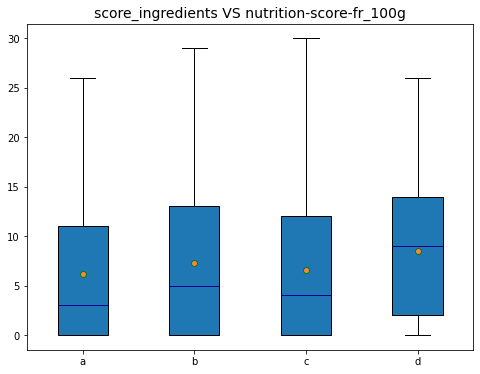

In [50]:
vars_all_score = vars_all_score.sort_values(by = 'score_ingredients', ascending = True)
X = "score_ingredients" # qualitative
Y = "nutrition-score-fr_100g" # quantitative

modalites = vars_all_score[X].unique()
groupes = []
for m in modalites:
    groupes.append(vars_all_score[vars_all_score[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('score_ingredients VS nutrition-score-fr_100g',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [51]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(vars_all_score[X],vars_all_score[Y])

0.012199473936887865

Le scoring par ingrédient nous permet de valoriser les aliments riches en protéines et en cholestérol, lipide booster de prise de masse.On constate également que le nutriscore est plus élevé pour les aliments de niveau d, il y a donc une adéquation entre ces deux mesures. À utiliser pour compléter l’application car elle ne référencie que certains aliments. 

### Nutriscore 

Hypothèse : Le nutriscore permet de valoriser tous les élements essentiels à la prise de masse. 

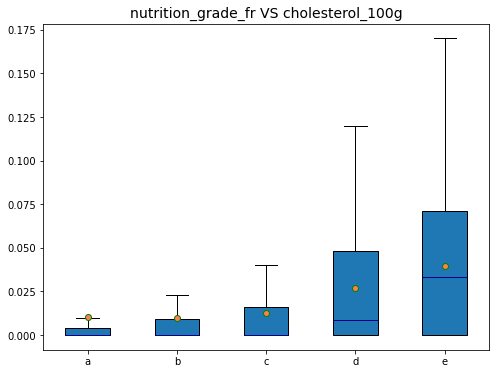

In [98]:
vars_all_ok = vars_all_ok.sort_values(by = 'nutrition_grade_fr', ascending = True)
X = "nutrition_grade_fr" # qualitative
Y = "cholesterol_100g" # quantitative

modalites = vars_all_ok[X].unique()
groupes = []
for m in modalites:
    groupes.append(vars_all_ok[vars_all_ok[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('nutrition_grade_fr VS cholesterol_100g',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [99]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(vars_all_score[X],vars_all_score[Y])

0.03651171924783211

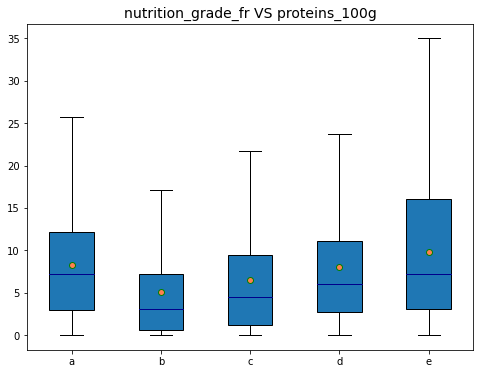

In [52]:
vars_all_ok = vars_all_ok.sort_values(by = 'nutrition_grade_fr', ascending = True)
X = "nutrition_grade_fr" # qualitative
Y = "proteins_100g" # quantitative

modalites = vars_all_ok[X].unique()
groupes = []
for m in modalites:
    groupes.append(vars_all_ok[vars_all_ok[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('nutrition_grade_fr VS proteins_100g',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [53]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(vars_all_ok[X],vars_all_ok[Y])

0.03757607772424469

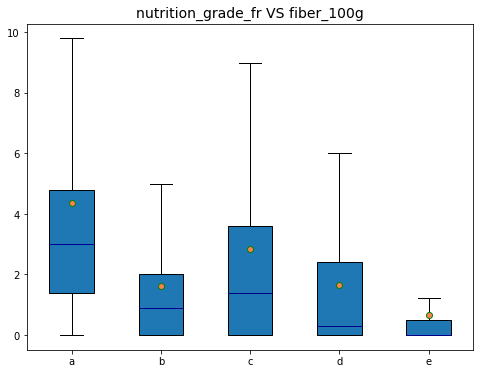

In [54]:
vars_all_ok = vars_all_ok.sort_values(by = 'nutrition_grade_fr', ascending = True)
X = "nutrition_grade_fr" # qualitative
Y = "fiber_100g" # quantitative

modalites = vars_all_ok[X].unique()
groupes = []
for m in modalites:
    groupes.append(vars_all_ok[vars_all_ok[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('nutrition_grade_fr VS fiber_100g',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [55]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(vars_all_ok[X],vars_all_ok[Y])

0.07993674171133314

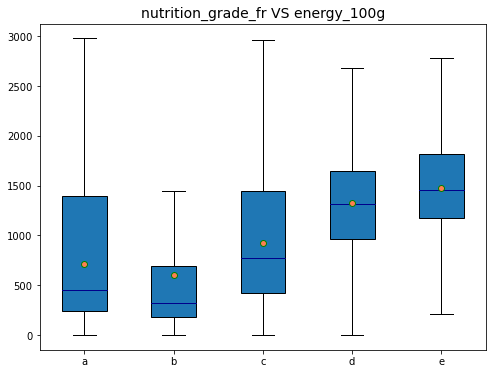

In [56]:
vars_all_ok = vars_all_ok.sort_values(by = 'nutrition_grade_fr', ascending = True)
X = "nutrition_grade_fr" # qualitative
Y = "energy_100g" # quantitative

modalites = vars_all_ok[X].unique()
groupes = []
for m in modalites:
    groupes.append(vars_all_ok[vars_all_ok[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('nutrition_grade_fr VS energy_100g',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [57]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(vars_all_ok[X],vars_all_ok[Y])

0.0015477597661026274

Le nutriscore nous permet de valoriser les aliments riches en fibres contrairement au scoring by ingredient. Il ne valorise pas le cholestérol, élément important dans la prise de masse. Les aliments qui apportent un taux d'énergie important ne sont pas bien notés. 


### Energie 

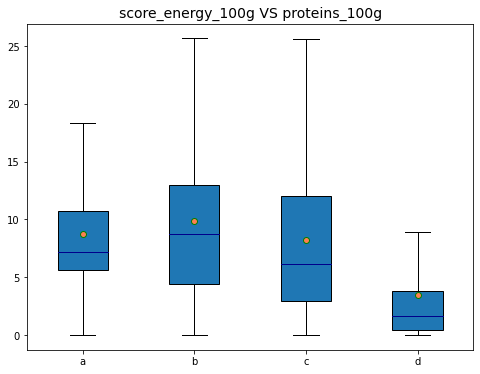

In [58]:
vars_all_ok = vars_all_ok.sort_values(by = 'score_energy_100g', ascending = True)
X = "score_energy_100g" # qualitative
Y = "proteins_100g" # quantitative

modalites = vars_all_ok[X].unique()
groupes = []
for m in modalites:
    groupes.append(vars_all_ok[vars_all_ok[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('score_energy_100g VS proteins_100g',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [59]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(vars_all_ok[X],vars_all_ok[Y])

0.142629555925778

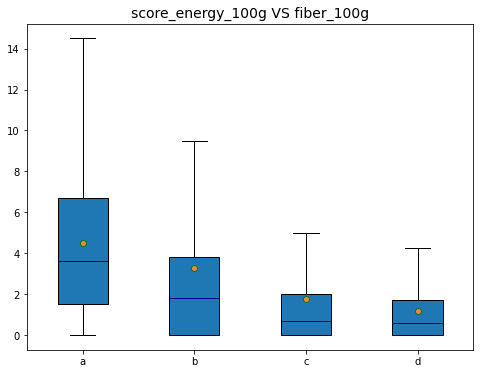

In [60]:
vars_all_ok = vars_all_ok.sort_values(by = 'score_energy_100g', ascending = True)
X = "score_energy_100g" # qualitative
Y = "fiber_100g" # quantitative

modalites = vars_all_ok[X].unique()
groupes = []
for m in modalites:
    groupes.append(vars_all_ok[vars_all_ok[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('score_energy_100g VS fiber_100g',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [61]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(vars_all_ok[X],vars_all_ok[Y])

0.08275557082819505

In [110]:
proteins_100g = vars_all_ok['proteins_100g']
energy_100g = vars_all_ok['energy_100g']
cholesterol_100g = vars_all_ok['cholesterol_100g']
filtered['proteins_100g'] = proteins_100g[~is_outlier(proteins_100g)]
filtered['energy_100g'] = energy_100g[~is_outlier(energy_100g)]
filtered['cholesterol_100g'] = cholesterol_100g[~is_outlier(cholesterol_100g)]

/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide
/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


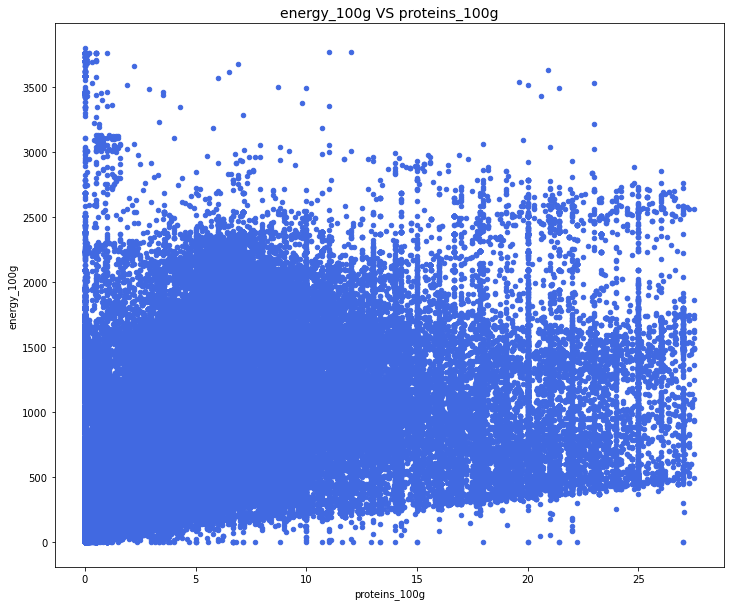

In [63]:
filtered.plot(x='proteins_100g', y= 'energy_100g', kind = 'scatter', color='royalblue', figsize=(12, 10))
plt.title('energy_100g VS proteins_100g',fontsize=14) 
plt.show()

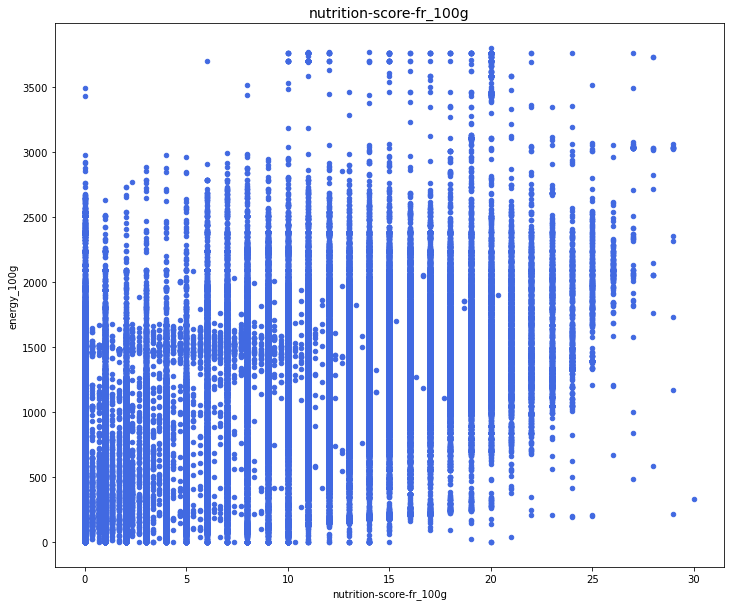

In [64]:
filtered.plot(x='nutrition-score-fr_100g', y= 'energy_100g', kind = 'scatter', color='royalblue', figsize=(12, 10))
plt.title('nutrition-score-fr_100g',fontsize=14) 
plt.show()

Les aliments qui apportent de l’énergie sont également riches en protéines ET en fibres. Ils procurent les nutriments essentiels à la prise de masse.

### Fiber

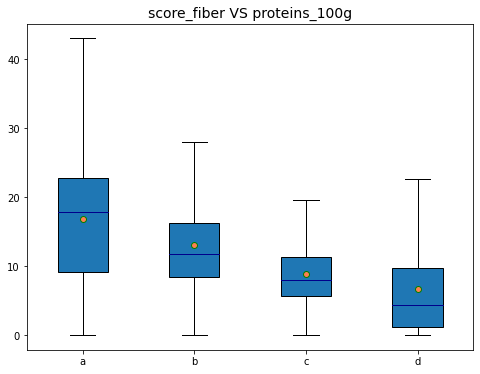

In [65]:
vars_all_ok = vars_all_ok.sort_values(by = 'score_fiber', ascending = True)
X = "score_fiber" # qualitative
Y = "proteins_100g" # quantitative

modalites = vars_all_ok[X].unique()
groupes = []
for m in modalites:
    groupes.append(vars_all_ok[vars_all_ok[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('score_fiber VS proteins_100g',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [66]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(vars_all_ok[X],vars_all_ok[Y])

0.0560725052444065

In [67]:
moyenne_nutriscore = vars_all_ok.groupby('nutrition_grade_fr').mean()
moyenne_nutriscore

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,additives_n,energy_100g
nutrition_grade_fr,,,,,,,,,,,,,,,
a,2.653785,0.029430,0.010368,3.481152,4.376061,8.305024,0.331864,0.000167,0.008128,0.058197,0.003935,0.308484,0.403075,1.028613,716.318256
b,3.683235,0.011498,0.009934,5.263746,1.622537,5.017641,0.521088,0.000119,0.009950,0.054171,0.001427,0.923901,0.795618,1.664572,603.763195
c,7.686124,0.030799,0.012414,10.924607,2.833934,6.438154,1.352297,0.000173,0.008790,0.072493,0.002939,6.197763,1.846531,2.062874,926.447989
d,14.043547,0.094746,0.026989,16.953015,1.645972,7.974654,1.704870,0.000163,0.006127,0.097018,0.003670,13.851891,5.463046,2.748190,1321.621810
e,20.056599,0.081285,0.039472,10.913959,0.675207,9.754582,1.721705,0.000137,0.003737,0.167674,0.001407,19.870827,11.255865,2.416620,1480.189949


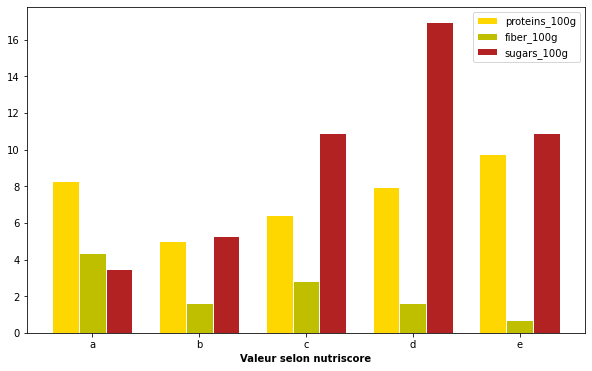

In [72]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = moyenne_nutriscore['proteins_100g']
bars2 = moyenne_nutriscore['fiber_100g']
bars3 = moyenne_nutriscore['sugars_100g']
bars4 = moyenne_nutriscore['trans-fat_100g']


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

 
# Make the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, bars1, color='gold', width=barWidth, edgecolor='white', label='proteins_100g')
plt.bar(r2, bars2, color='y', width=barWidth, edgecolor='white', label='fiber_100g')
plt.bar(r3, bars3, color='firebrick', width=barWidth, edgecolor='white', label='sugars_100g')


 
# Add xticks on the middle of the group bars
plt.xlabel('Valeur selon nutriscore', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['a','b','c','d', 'e'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

### ACP

### Eboulis des valeurs propres 

In [73]:
vars_ok = vars_all_ok._get_numeric_data()
vars_ok

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,additives_n,energy_100g
160098,3.50,0.000000,0.006000,2.00,21.000000,10.50,1.00000,0.000614,0.016667,0.107667,0.005167,6.333333,0.50,0.000000,1420.0
112379,0.90,0.000000,0.014667,2.10,17.400000,23.40,0.04000,0.000070,0.009833,0.084667,0.010400,0.000000,0.20,0.000000,1318.0
92551,0.00,0.000000,0.000000,2.78,44.400000,22.22,0.17526,0.000000,0.000000,0.000000,0.007500,0.000000,0.00,0.000000,523.0
73748,0.00,0.000000,0.000000,55.00,15.000000,2.50,0.25400,0.000000,0.000000,0.250000,0.002700,9.000000,0.00,0.000000,1255.0
92578,0.00,0.000000,0.000000,2.78,44.400000,22.22,0.17526,0.000000,0.000000,0.167000,0.007500,0.000000,0.00,0.000000,582.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133417,24.46,0.116667,0.055333,1.10,0.000000,13.80,1.77000,0.000085,0.000567,0.081000,0.000987,19.000000,9.60,1.666667,1213.0
172508,23.00,0.220000,0.086667,23.00,1.033333,6.80,0.39000,0.000138,0.000900,0.059667,0.000803,20.000000,12.00,3.333333,1385.0
59622,28.00,0.000000,0.060000,0.00,0.000000,12.00,2.47142,0.000000,0.000000,0.027000,0.001440,23.000000,10.67,4.000000,1284.0
150156,32.80,0.553333,0.067000,1.60,0.833333,5.40,1.50000,0.000067,0.000000,0.000000,0.000627,20.000000,21.40,1.000000,1411.0


In [74]:
# vars_ok = vars_all_ok.loc[:,['proteins_100g','fiber_100g','energy_100g','nutrition-score-fr_100g']]
# vars_ok

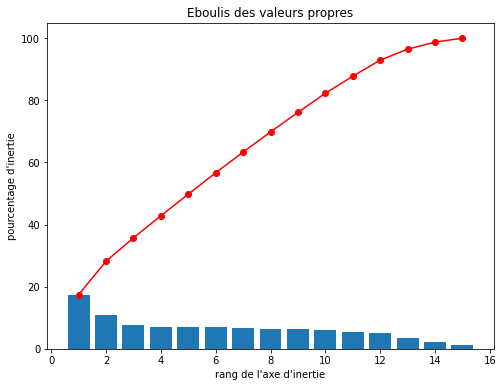

In [75]:
# choix du nombre et des composantes à calculer
n_comp = vars_ok.shape[1]
features = vars_ok.columns
X = vars_ok.values

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
plt.figure(figsize=(8, 6))
display_scree_plot(pca)

On constate que plus de 20% de l’inertie totale est associé à F1 et 15% à F2, donc le premier plan factoriel représente 35% de l’inertie totale. Il y a une certaine perte d'information mais nous pouvons étudier les premiers plans car ils représentent plus de 100/14 = 7,14% de l'inertie totale. 


### Cercle des correlations

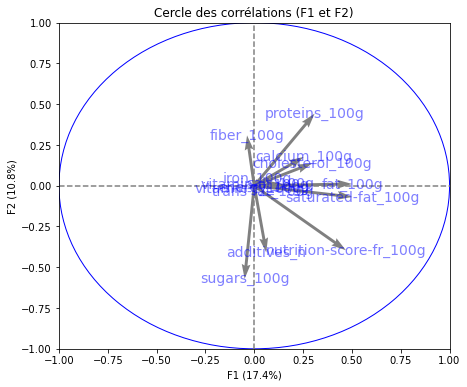

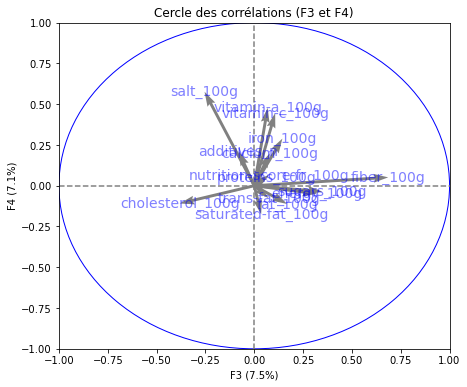

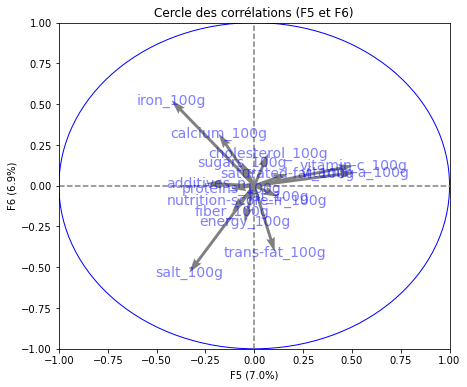

In [76]:
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

Sur le premier plan factoriel, fat et saturated fat sont positivement corrélés à F1 ce qui confirme notre hypothèse dégagée sur la heatmap.  
Le nutriscore est positivement corrélé à F1 mais aussi à F2 avec sugar et additives. Plus le nutriscore est élevé et donc mauvais, plus les aliments sont riches en sucre, gras et sont composés d'additifs. 
Ce qui confirme notre hypothèse que le nutriscore permet de sélectionner des aliments favorables à la prise de masse.
!

### Projection

#### a - des individus

In [77]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(vars_ok)
    distortions.append(kmeanModel.inertia_)

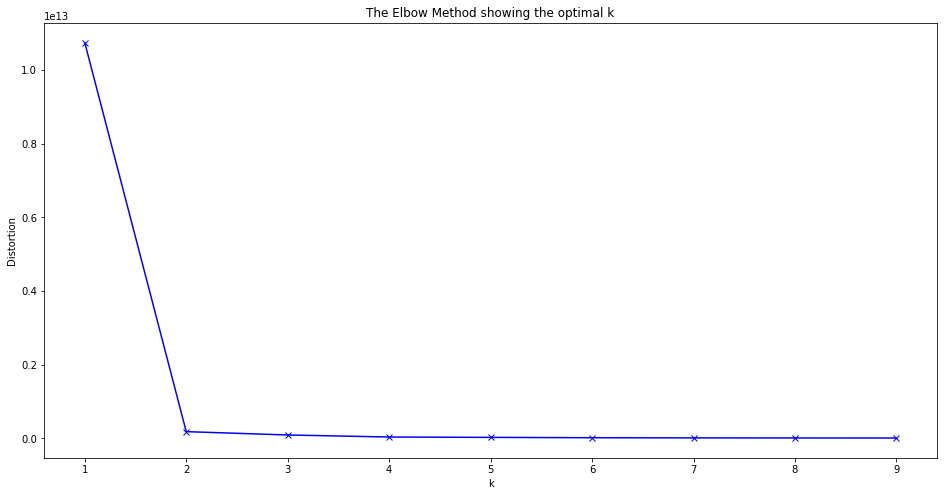

In [78]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [79]:
# Clustering par K-means
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = kmeanModel.labels_
clusters

mesure = vars_ok.copy()
mesure['cluster'] = clusters
mesure

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,additives_n,energy_100g,cluster
160098,3.50,0.000000,0.006000,2.00,21.000000,10.50,1.00000,0.000614,0.016667,0.107667,0.005167,6.333333,0.50,0.000000,1420.0,0
112379,0.90,0.000000,0.014667,2.10,17.400000,23.40,0.04000,0.000070,0.009833,0.084667,0.010400,0.000000,0.20,0.000000,1318.0,0
92551,0.00,0.000000,0.000000,2.78,44.400000,22.22,0.17526,0.000000,0.000000,0.000000,0.007500,0.000000,0.00,0.000000,523.0,0
73748,0.00,0.000000,0.000000,55.00,15.000000,2.50,0.25400,0.000000,0.000000,0.250000,0.002700,9.000000,0.00,0.000000,1255.0,0
92578,0.00,0.000000,0.000000,2.78,44.400000,22.22,0.17526,0.000000,0.000000,0.167000,0.007500,0.000000,0.00,0.000000,582.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133417,24.46,0.116667,0.055333,1.10,0.000000,13.80,1.77000,0.000085,0.000567,0.081000,0.000987,19.000000,9.60,1.666667,1213.0,1
172508,23.00,0.220000,0.086667,23.00,1.033333,6.80,0.39000,0.000138,0.000900,0.059667,0.000803,20.000000,12.00,3.333333,1385.0,1
59622,28.00,0.000000,0.060000,0.00,0.000000,12.00,2.47142,0.000000,0.000000,0.027000,0.001440,23.000000,10.67,4.000000,1284.0,1
150156,32.80,0.553333,0.067000,1.60,0.833333,5.40,1.50000,0.000067,0.000000,0.000000,0.000627,20.000000,21.40,1.000000,1411.0,1


/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


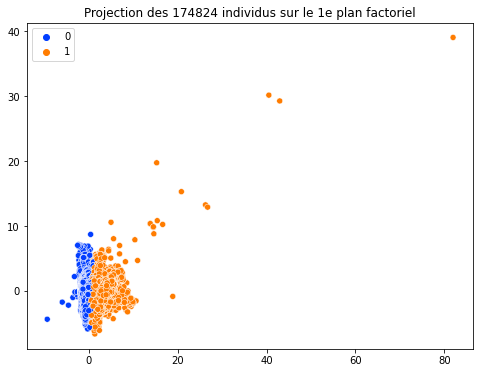

In [80]:
# Affichage du clustering par projection des individus sur le premier plan factoriel

X_projected = pca.transform(X_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(X_projected[:, 0], X_projected[:, 1], hue=clusters, cmap = 'jet', palette="bright")
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


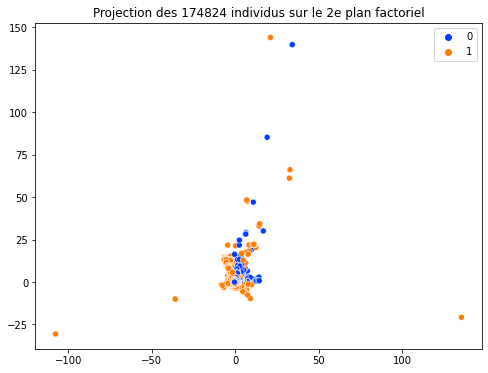

In [81]:
# Affichage du clustering par projection des individus sur le deuxième plan factoriel

plt.figure(figsize=(8, 6))
sns.scatterplot(X_projected[:, 2], X_projected[:, 3], hue=clusters, cmap = 'jet', palette="bright", sizes=10)
plt.title("Projection des {} individus sur le 2e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


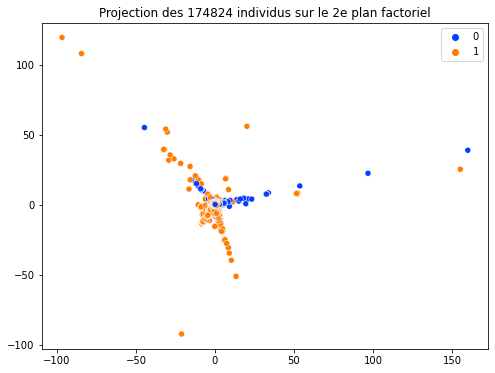

In [82]:
# Affichage du clustering par projection des individus sur le troisième plan factoriel

plt.figure(figsize=(8, 6))
sns.scatterplot(X_projected[:, 4], X_projected[:, 5], hue=clusters, cmap = 'jet', palette="bright", sizes=10)
plt.title("Projection des {} individus sur le 2e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

#### b - des centroïdes

In [83]:
# Calcul des coordonnées des centroïdes 
centroidefin = mesure.groupby(["cluster"], as_index=False).mean()

# Extraction des clutsers
clusters_c = centroidefin["cluster"]
clusters_c = clusters_c.to_numpy()

# Affichage des données des centroïdes
centroidefin = centroidefin.drop(columns=["cluster"])
centroidefin

,fat_100g,trans-fat_100g,cholesterol_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,saturated-fat_100g,additives_n,energy_100g
0,3.423363,0.013069,0.009053,10.333700,2.518918,5.696440,0.793862,0.000142,0.009403,0.052803,0.002103,4.014849,0.832401,1.820378,728.327913
1,21.138250,0.133381,0.038541,9.134278,2.136097,10.912614,1.867509,0.000189,0.003743,0.146861,0.004885,14.835541,8.572783,2.408176,1565.549030


/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


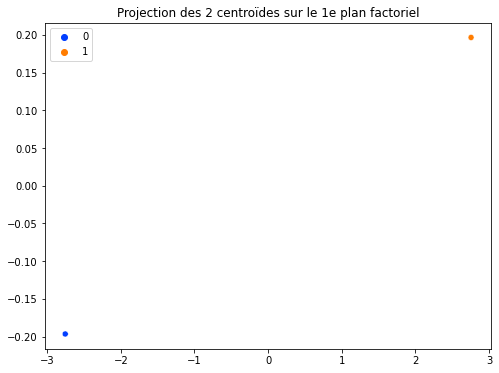

In [84]:
# préparation des données pour le clustering
Xc = centroidefin.values

# Centrage et Réduction
std_scale_c = preprocessing.StandardScaler().fit(Xc)
Xc_scaled = std_scale_c.transform(Xc)

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca_c = decomposition.PCA(n_components=2).fit(Xc)

Xc_projected = pca.transform(Xc_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(Xc_projected[:, 0], Xc_projected[:, 1], hue = clusters_c, cmap = 'jet', palette="bright")
plt.title("Projection des {} centroïdes sur le 1e plan factoriel".format(Xc_projected.shape[0]))
plt.show(block=False)

## ANOVA

Hypothèse H0 : le nutriscore ne dépend pas de score_proteins + score_fiber + score_energy_100g  
Hypothèse H1 : le nutriscore dépend de score_proteins + score_fiber + score_energy_100g  

In [85]:
anova = vars_all_ok.rename(columns={"nutrition-score-fr_100g": "nutrition_score_fr_100g"})
anova = anova.loc[:,['nutrition_score_fr_100g','score_fiber','score_energy_100g','score_proteins']]
anova

,nutrition_score_fr_100g,score_fiber,score_energy_100g,score_proteins
160098,6.333333,a,b,c
112379,0.000000,a,b,b
92551,0.000000,a,c,b
73748,9.000000,a,b,d
92578,0.000000,a,c,b
...,...,...,...,...
133417,19.000000,d,b,c
172508,20.000000,d,b,d
59622,23.000000,d,b,c
150156,20.000000,d,b,d


In [86]:
# anova['nutrition_score_fr_100g'] = np.log(anova['nutrition_score_fr_100g'])
# anova.replace([np.inf, -np.inf], np.nan, inplace=True)
#anova = anova.dropna()
# anova.describe()

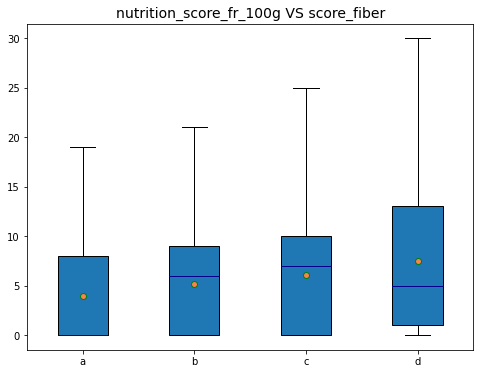

In [87]:
anova = anova.sort_values(by = 'score_fiber', ascending = True)
X = "score_fiber" # qualitative
Y = "nutrition_score_fr_100g" # quantittive

modalites = anova[X].unique()
groupes = []
for m in modalites:
    groupes.append(anova[anova[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('nutrition_score_fr_100g VS score_fiber',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

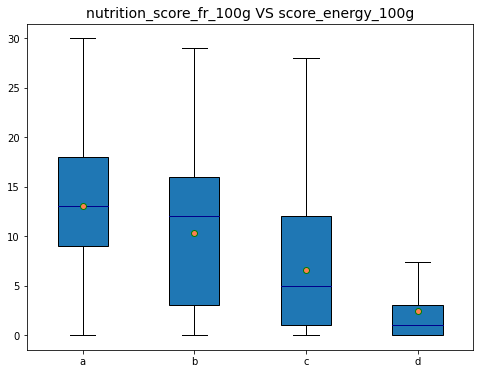

In [88]:
anova = anova.sort_values(by = 'score_energy_100g', ascending = True)
X = "score_energy_100g" # qualitative
Y = "nutrition_score_fr_100g" # quantittive

modalites = anova[X].unique()
groupes = []
for m in modalites:
    groupes.append(anova[anova[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('nutrition_score_fr_100g VS score_energy_100g',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

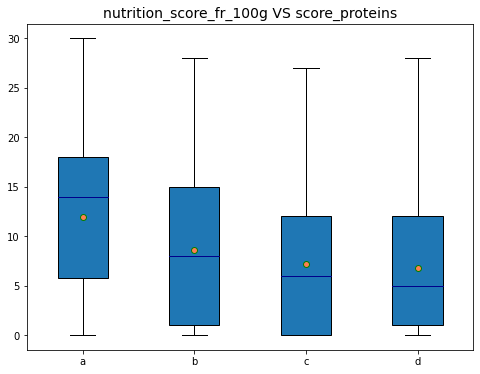

In [89]:
anova = anova.sort_values(by = 'score_proteins', ascending = True)
X = "score_proteins" # qualitative
Y = "nutrition_score_fr_100g" # quantittive

modalites = anova[X].unique()
groupes = []
for m in modalites:
    groupes.append(anova[anova[X]==m][Y])


medianprops = {'color':"DarkBlue"}
meanprops = {'marker':'o', 'markeredgecolor':'Green',
            'markerfacecolor':'coral'}
plt.figure(figsize=(8, 6))
plt.title('nutrition_score_fr_100g VS score_proteins',fontsize=14) 
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [90]:
anova_proteins = smf.ols('nutrition_score_fr_100g ~ score_proteins + score_fiber + score_energy_100g', data=anova).fit()
print(anova_proteins.summary())

                               OLS Regression Results                              
Dep. Variable:     nutrition_score_fr_100g   R-squared:                       0.422
Model:                                 OLS   Adj. R-squared:                  0.422
Method:                      Least Squares   F-statistic:                 1.417e+04
Date:                     Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                             08:33:39   Log-Likelihood:            -5.3701e+05
No. Observations:                   174824   AIC:                         1.074e+06
Df Residuals:                       174814   BIC:                         1.074e+06
Df Model:                                9                                         
Covariance Type:                 nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

0.422 est très élevé, à partir de 0,12 on conclut qu'il y a une correlation donc 42% du nutrition score est attribué aux facteurs score_proteins + score_fiber + score_energy_100g.  
On y voit les paramètres estimés mais ici, ce ne sont pas les paramètres qui nous intéressent le plus.

#### Test de Fisher

Ce qui nous intéresse réellement, c'est le **test de Fisher**.
La p-valeur de ce test 0.00 est très petite et largement inférieure à 5 %. On rejette donc l'hypothèse H0 qui est que le nutriscore ne dépend pas de score_proteins + score_fiber + score_energy_100g.

*Le score_proteins + score_fiber + score_energy_100g a donc bien un effet sur le nutriscore, comme nous en avions l'intuition en regardant les boîtes à moustaches.*

Pour obtenir le tableau de l'analyse de la variance, on utilise la commande anova_lm :

In [91]:
sm.stats.anova_lm(anova_proteins, typ=2)

,sum_sq,df,F,PR(>F)
score_proteins,1.508425e+05,3.0,1844.150414,0.0
score_fiber,6.185417e+05,3.0,7562.086062,0.0
score_energy_100g,3.177170e+06,3.0,38843.034525,0.0
Residual,4.766310e+06,174814.0,NaN,NaN


Voir s'il y a une correlation entre nutrition_grade_fr et Le score_proteins + score_fiber + score_energy_100g -> PR = 0 donc hypothèse H0 égalité des variances rejetée donc modèle valide 

#### Testez l’homoscédasticité
On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :

In [92]:
variables = anova_proteins.model.exog
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(anova_proteins.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 0.0


La p-valeur ici est inférieure à $5$%, on rejette donc l'hypothèse $H0$ selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).

### Plot Predicted values VS Residus

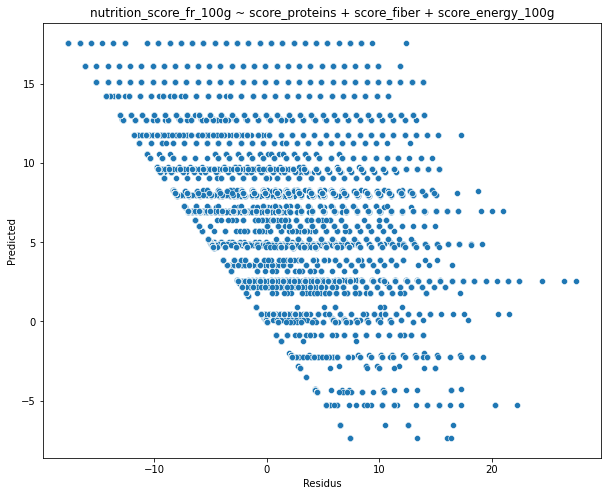

In [93]:
plt.figure(figsize=(10, 8))
anova['Predicted'] = anova_proteins.predict()
anova['Residus'] = anova_proteins.resid
ax = sns.scatterplot(x="Residus", y="Predicted", data=anova)
ax.set(xlabel='Residus', ylabel='Predicted')
plt.title('nutrition_score_fr_100g ~ score_proteins + score_fiber + score_energy_100g')
plt.show()

La forme du nuage de résidus peut laisser présager un effet d'homoscédasticité des résidus. 

#### Testez la normalité des résidus

Si l'on veut tester la normalité des résidus, on peut faire un test de Shapiro-Wilk.

In [94]:
shapiro(anova_proteins.resid)

/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9918051362037659, pvalue=0.0)

Ici, l'hypothèse de normalité est remise en cause (p-value = 0.000 < 0.05).

/Users/fanny/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


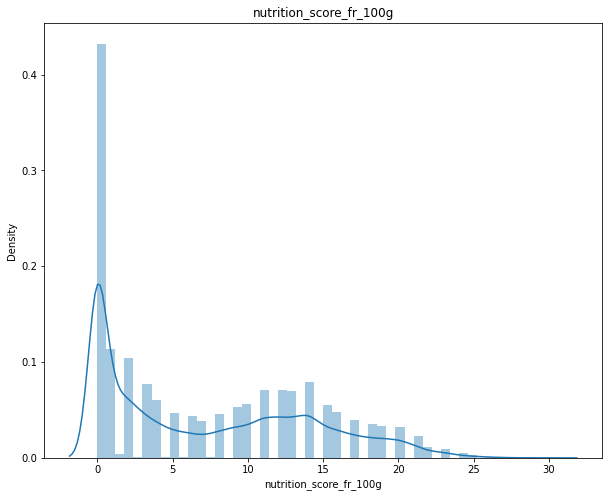

In [95]:
plt.figure(figsize=(10, 8))
sns.distplot(anova["nutrition_score_fr_100g"]).set_title("nutrition_score_fr_100g")
plt.show()

In [96]:
ks_2samp(anova["nutrition_score_fr_100g"],list(np.random.normal(np.mean(anova["nutrition_score_fr_100g"]), np.std(anova["nutrition_score_fr_100g"]), 1000)))


KstestResult(statistic=0.156, pvalue=1.3614533855452519e-21)

pvalue < 0,05 < 5% -> On peut donc rejeter l’hypothèse de normalité au niveau de test 5%

Le nutriscore est une mesure efficace pour la consommation de fibres et le choix des aliments avec les meilleures valeurs nutritionnelles en évitant les aliments ultra transformés. 
Pour que l’apport en énergie soit suffisant, une métrique de quantité est ajoutée à l’application. Le score ingrédient est une mesure efficace pour la consommation de protéines et de cholestérol, ce qui permet de compléter le nustriscore avec une orientation prise de masse.

La combinaison de ces 3 éléments permets de produire une application efficace pouvant être utilisée avec confiance par tous les sportifs !
